### DEPENDECIES

In [1]:
# Load libraries.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import os

import pandas_datareader.data as web
from pandas_datareader import data as pdr

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Statistics
import statsmodels.api as sm
import arch 
from statsmodels.compat import lzip

# Data Viz
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
import seaborn as sns
pd.options.mode.chained_assignment = None

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from statsmodels.tools.tools import add_constant

import statsmodels.api as sm
import arch 
from statsmodels.compat import lzip

from math import sqrt


mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

### DATA

In [2]:
df = pd.read_csv("combined_data.csv")

In [3]:
# Remove sentiment data
df = df.drop(columns=['Sentiment Text',
       'Sentiment Value', 'Sentiment Lag_1', 'Sentiment Lag_2',
       'Sentiment Lag_3', 'Sentiment Lag_4', 'Sentiment Lag_5'])

In [4]:
TICKERS = ['IXN', 'VNQ', 'XLE', 'XLF', 'XLY']

In [5]:
df.columns

Index(['Date', 'IXN', 'VNQ', 'XLE', 'XLF', 'XLY', 'GDPC1', 'CPIAUCSL',
       'UNRATE', 'PAYEMS', 'RRSFS', 'GFDEBTN', 'VIXCLS', 'DFF'],
      dtype='object')

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.set_index("Date", inplace=True)

In [8]:
df.columns

Index(['IXN', 'VNQ', 'XLE', 'XLF', 'XLY', 'GDPC1', 'CPIAUCSL', 'UNRATE',
       'PAYEMS', 'RRSFS', 'GFDEBTN', 'VIXCLS', 'DFF'],
      dtype='object')

In [9]:
df

IXN        VNQ        XLE        XLF         XLY  \
Date                                                                 
2014-01-01  12.641662  42.107735  58.413666  14.477487   58.956947   
2014-01-02  12.486846  42.114258  57.582096  14.398009   58.683434   
2014-01-03  12.436762  42.349052  57.370922  14.497356   58.524654   
2014-01-06  12.406402  42.564293  57.450108  14.510599   58.162983   
2014-01-07  12.489882  42.753437  57.885685  14.517219   58.515846   
...               ...        ...        ...        ...         ...   
2024-10-07  81.199997  94.269997  93.510002  45.090000  195.089996   
2024-10-08  82.669998  94.459999  91.070000  45.349998  196.990005   
2024-10-09  83.650002  94.559998  91.620003  45.770000  198.399994   
2024-10-10  83.360001  93.720001  92.239998  45.630001  197.419998   
2024-10-11  83.610001  94.779999  92.809998  46.509998  196.580002   

                   GDPC1  CPIAUCSL  UNRATE    PAYEMS     RRSFS       GFDEBTN  \
Date                                                                           
2014-01-01  17974.698333   234.719     6.7  137367.0  180128.0  1.745286e+07   
2014-01-02  17974.698333   234.719     6.7  137367.0  180128.0  1.745286e+07   
2014-01-03  17974.698333   234.719     6.7  137367.0  180128.0  1.745286e+07   
2014-01-06  17974.698333   234.719     6.7  137367.0  180128.0  1.745286e+07   
2014-01-07  17974.698333   234.719     6.7  137367.0  180128.0  1.745286e+07   
...                  ...       ...     ...       ...       ...           ...   
2024-10-07  22924.863000   314.121     4.2  158779.0  226274.0  3.483163e+07   
2024-10-08  22924.863000   314.121     4.2  158779.0  226274.0  3.483163e+07   
2024-10-09  22924.863000   314.121     4.2  158779.0  226274.0  3.483163e+07   
2024-10-10  22924.863000   314.121     4.2  158779.0  226274.0  3.483163e+07   
2024-10-11  22924.863000   314.121     4.2  158779.0  226274.0  3.483163e+07   

            VIXCLS   DFF  
Date                      
2014-01-01   13.72  0.07  
2014-01-02   13.72  0.07  
2014-01-03   13.72  0.07  
2014-01-06   13.72  0.07  
2014-01-07   13.72  0.07  
...            ...   ...  
2024-10-07   16.15  4.83  
2024-10-08   16.15  4.83  
2024-10-09   16.15  4.83  
2024-10-10   16.15  4.83  
2024-10-11   16.15  4.83  

[2813 rows x 13 columns]

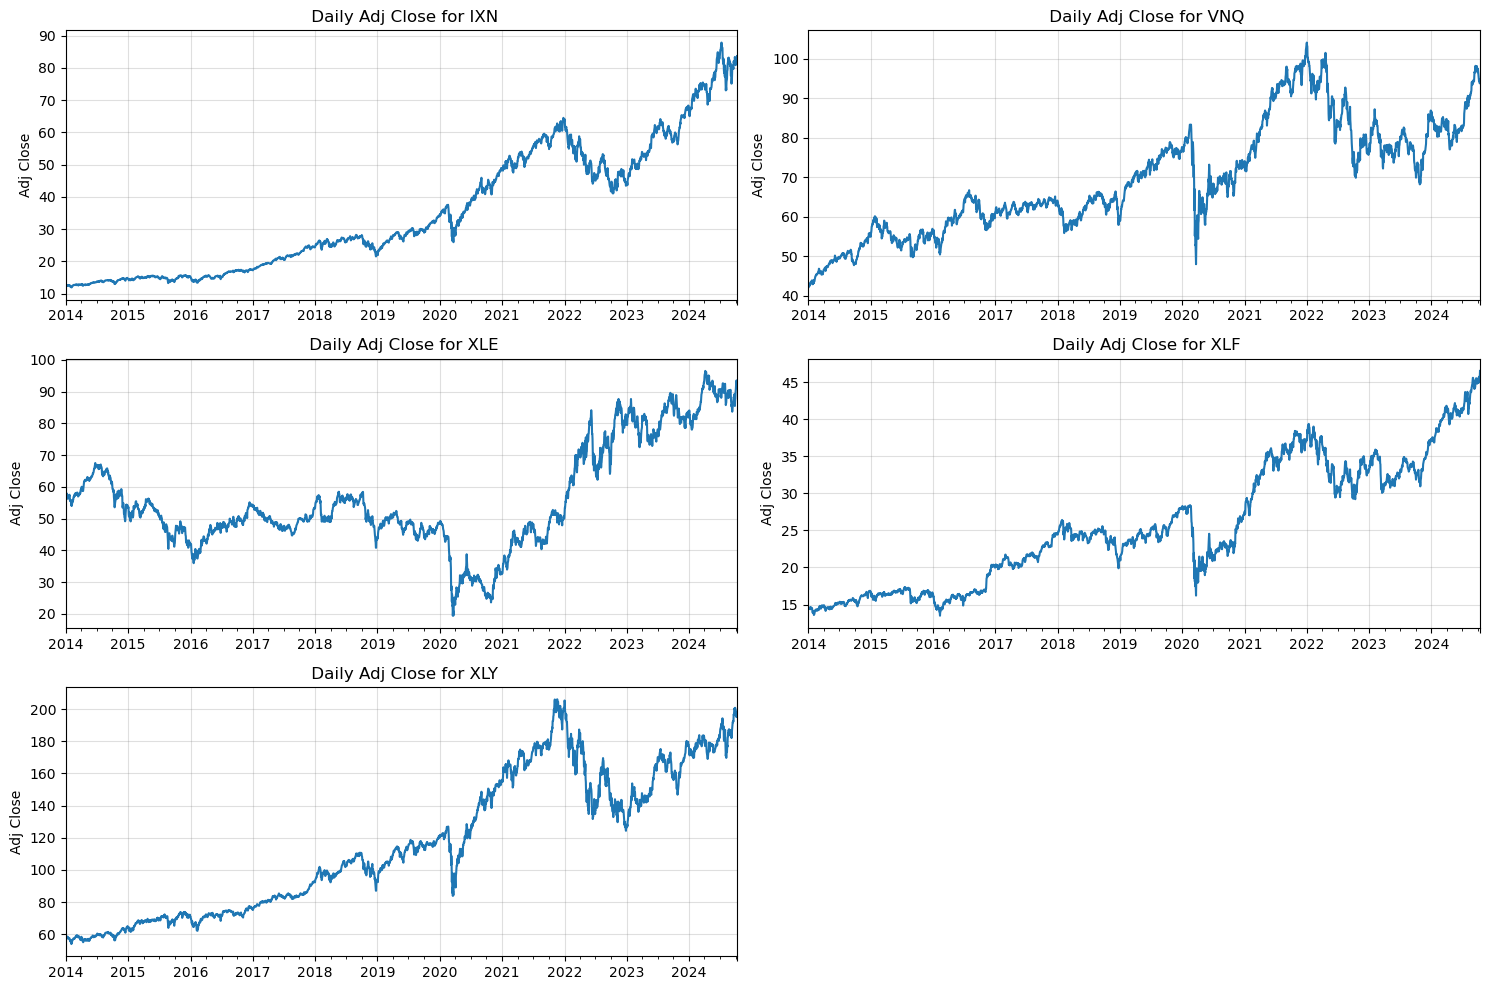

In [10]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, ticker in enumerate(TICKERS, 1):
    plt.subplot(3, 2, i)
    df[ticker].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f" Daily Adj Close for {ticker}")
    
plt.tight_layout()

In [11]:
df.describe()

IXN          VNQ          XLE          XLF          XLY  \
count  2813.000000  2813.000000  2813.000000  2813.000000  2813.000000   
mean     35.336793    69.531805    56.129852    25.552476   116.229936   
std      19.703505    13.786586    16.434334     8.247927    43.169895   
min      11.948031    42.107735    19.394384    13.498847    53.963722   
25%      16.851921    59.220108    46.504452    16.954639    73.679398   
50%      28.099426    66.854347    50.893711    24.204712   109.384346   
75%      51.300697    79.328812    65.543121    32.752811   157.028870   
max      87.809998   104.028816    96.501701    46.509998   206.163620   

              GDPC1     CPIAUCSL       UNRATE         PAYEMS          RRSFS  \
count   2813.000000  2813.000000  2813.000000    2813.000000    2813.000000   
mean   20446.413857   262.574664     4.848951  147526.613935  205072.391753   
std     1421.121634    25.455546     1.724211    6117.620076   17378.148372   
min    17953.974000   234.719000     3.400000  130421.000000  159418.000000   
25%    19197.938000   240.545000     3.800000  142810.000000  190404.000000   
50%    20341.632667   255.213000     4.300000  147375.000000  199931.000000   
75%    21738.871000   282.390000     5.400000  151666.000000  225575.000000   
max    22924.863000   314.121000    14.800000  158779.000000  233440.000000   

            GFDEBTN       VIXCLS          DFF  
count  2.813000e+03  2813.000000  2813.000000  
mean   2.460834e+07    18.067369     1.526651  
std    5.737399e+06     6.875834     1.819699  
min    1.745286e+07     9.510000     0.050000  
25%    1.970791e+07    13.400000     0.080000  
50%    2.202788e+07    16.120000     0.570000  
75%    3.040096e+07    20.560000     2.400000  
max    3.483163e+07    53.540000     5.330000

In [12]:
start = dt.datetime(2014, 1, 1)
end = dt.datetime(2024, 10, 12)

SPY = yf.download("SPY", start=start, end=end)
SPY = SPY[["Adj Close"]].rename(columns={"Adj Close": "SPY"})

[*********************100%%**********************]  1 of 1 completed


In [13]:
SPY

SPY
Date                  
2014-01-02  151.242950
2014-01-03  151.218048
2014-01-06  150.779861
2014-01-07  151.705917
2014-01-08  151.739044
...                ...
2024-10-07  567.799988
2024-10-08  573.169983
2024-10-09  577.140015
2024-10-10  576.130005
2024-10-11  579.580017

[2713 rows x 1 columns]

#### MERGED DAILY DATA

In [14]:
daily_price = pd.concat([df, SPY], axis=1)
daily_price

IXN        VNQ        XLE        XLF         XLY  \
Date                                                                 
2014-01-01  12.641662  42.107735  58.413666  14.477487   58.956947   
2014-01-02  12.486846  42.114258  57.582096  14.398009   58.683434   
2014-01-03  12.436762  42.349052  57.370922  14.497356   58.524654   
2014-01-06  12.406402  42.564293  57.450108  14.510599   58.162983   
2014-01-07  12.489882  42.753437  57.885685  14.517219   58.515846   
...               ...        ...        ...        ...         ...   
2024-10-07  81.199997  94.269997  93.510002  45.090000  195.089996   
2024-10-08  82.669998  94.459999  91.070000  45.349998  196.990005   
2024-10-09  83.650002  94.559998  91.620003  45.770000  198.399994   
2024-10-10  83.360001  93.720001  92.239998  45.630001  197.419998   
2024-10-11  83.610001  94.779999  92.809998  46.509998  196.580002   

                   GDPC1  CPIAUCSL  UNRATE    PAYEMS     RRSFS       GFDEBTN  \
Date                                                                           
2014-01-01  17974.698333   234.719     6.7  137367.0  180128.0  1.745286e+07   
2014-01-02  17974.698333   234.719     6.7  137367.0  180128.0  1.745286e+07   
2014-01-03  17974.698333   234.719     6.7  137367.0  180128.0  1.745286e+07   
2014-01-06  17974.698333   234.719     6.7  137367.0  180128.0  1.745286e+07   
2014-01-07  17974.698333   234.719     6.7  137367.0  180128.0  1.745286e+07   
...                  ...       ...     ...       ...       ...           ...   
2024-10-07  22924.863000   314.121     4.2  158779.0  226274.0  3.483163e+07   
2024-10-08  22924.863000   314.121     4.2  158779.0  226274.0  3.483163e+07   
2024-10-09  22924.863000   314.121     4.2  158779.0  226274.0  3.483163e+07   
2024-10-10  22924.863000   314.121     4.2  158779.0  226274.0  3.483163e+07   
2024-10-11  22924.863000   314.121     4.2  158779.0  226274.0  3.483163e+07   

            VIXCLS   DFF         SPY  
Date                                  
2014-01-01   13.72  0.07         NaN  
2014-01-02   13.72  0.07  151.242950  
2014-01-03   13.72  0.07  151.218048  
2014-01-06   13.72  0.07  150.779861  
2014-01-07   13.72  0.07  151.705917  
...            ...   ...         ...  
2024-10-07   16.15  4.83  567.799988  
2024-10-08   16.15  4.83  573.169983  
2024-10-09   16.15  4.83  577.140015  
2024-10-10   16.15  4.83  576.130005  
2024-10-11   16.15  4.83  579.580017  

[2813 rows x 14 columns]

#### MONTHLY DATA

In [15]:
monthly_price = daily_price.resample('M').mean()
monthly_price

IXN        VNQ        XLE        XLF         XLY  \
Date                                                                 
2014-01-31  12.457348  43.089764  56.785265  14.375264   57.421918   
2014-02-28  12.525245  44.983731  56.341033  14.154623   56.994498   
2014-03-31  12.756795  45.954099  57.822968  14.696583   58.264329   
2014-04-30  12.737350  47.073186  60.651090  14.561654   56.622703   
2014-05-31  12.944183  48.584307  62.489093  14.606373   56.922787   
...               ...        ...        ...        ...         ...   
2024-06-30  81.671523  82.019629  88.690768  40.899914  179.240408   
2024-07-31  83.266957  86.388983  90.604804  42.437828  187.514398   
2024-08-31  79.167727  91.346167  88.788127  43.214182  180.273941   
2024-09-30  80.004285  96.462601  86.802246  44.939969  192.271708   
2024-10-31  82.188889  95.078888  91.918889  45.455556  197.295554   

                   GDPC1    CPIAUCSL    UNRATE         PAYEMS          RRSFS  \
Date                                                                           
2014-01-31  17973.797275  234.743739  6.695652  137375.000000  180039.217391   
2014-02-28  17957.839617  235.300950  6.605000  137558.950000  178198.850000   
2014-03-31  18034.967873  235.569905  6.700000  137723.190476  180413.047619   
2014-04-30  18112.112864  236.048000  6.677273  138001.136364  181883.181818   
2014-05-31  18185.911000  236.468000  6.200000  138298.000000  183336.000000   
...                  ...         ...       ...            ...            ...   
2024-06-30  22924.863000  313.225000  4.000000  158430.000000  224857.000000   
2024-07-31  22924.863000  313.070087  4.108696  158551.869565  224454.652174   
2024-08-31  22924.863000  313.534000  4.300000  158637.000000  226581.000000   
2024-09-30  22924.863000  314.121000  4.200000  158779.000000  226274.000000   
2024-10-31  22924.863000  314.121000  4.200000  158779.000000  226274.000000   

                 GFDEBTN     VIXCLS       DFF         SPY  
Date                                                       
2014-01-31  1.745931e+07  13.923913  0.070000  150.522796  
2014-02-28  1.760175e+07  18.189500  0.069500  150.349091  
2014-03-31  1.761218e+07  13.994286  0.060000  154.474141  
2014-04-30  1.762262e+07  13.858636  0.061364  154.723773  
2014-05-31  1.763261e+07  13.410000  0.090000  157.105267  
...                  ...        ...       ...         ...  
2024-06-30  3.483163e+07  12.920000  5.330000  537.665861  
2024-07-31  3.483163e+07  12.610435  5.330000  550.330164  
2024-08-31  3.483163e+07  16.360000  5.330000  544.880518  
2024-09-30  3.483163e+07  15.054762  5.306190  559.835788  
2024-10-31  3.483163e+07  16.150000  4.830000  572.455553  

[130 rows x 14 columns]

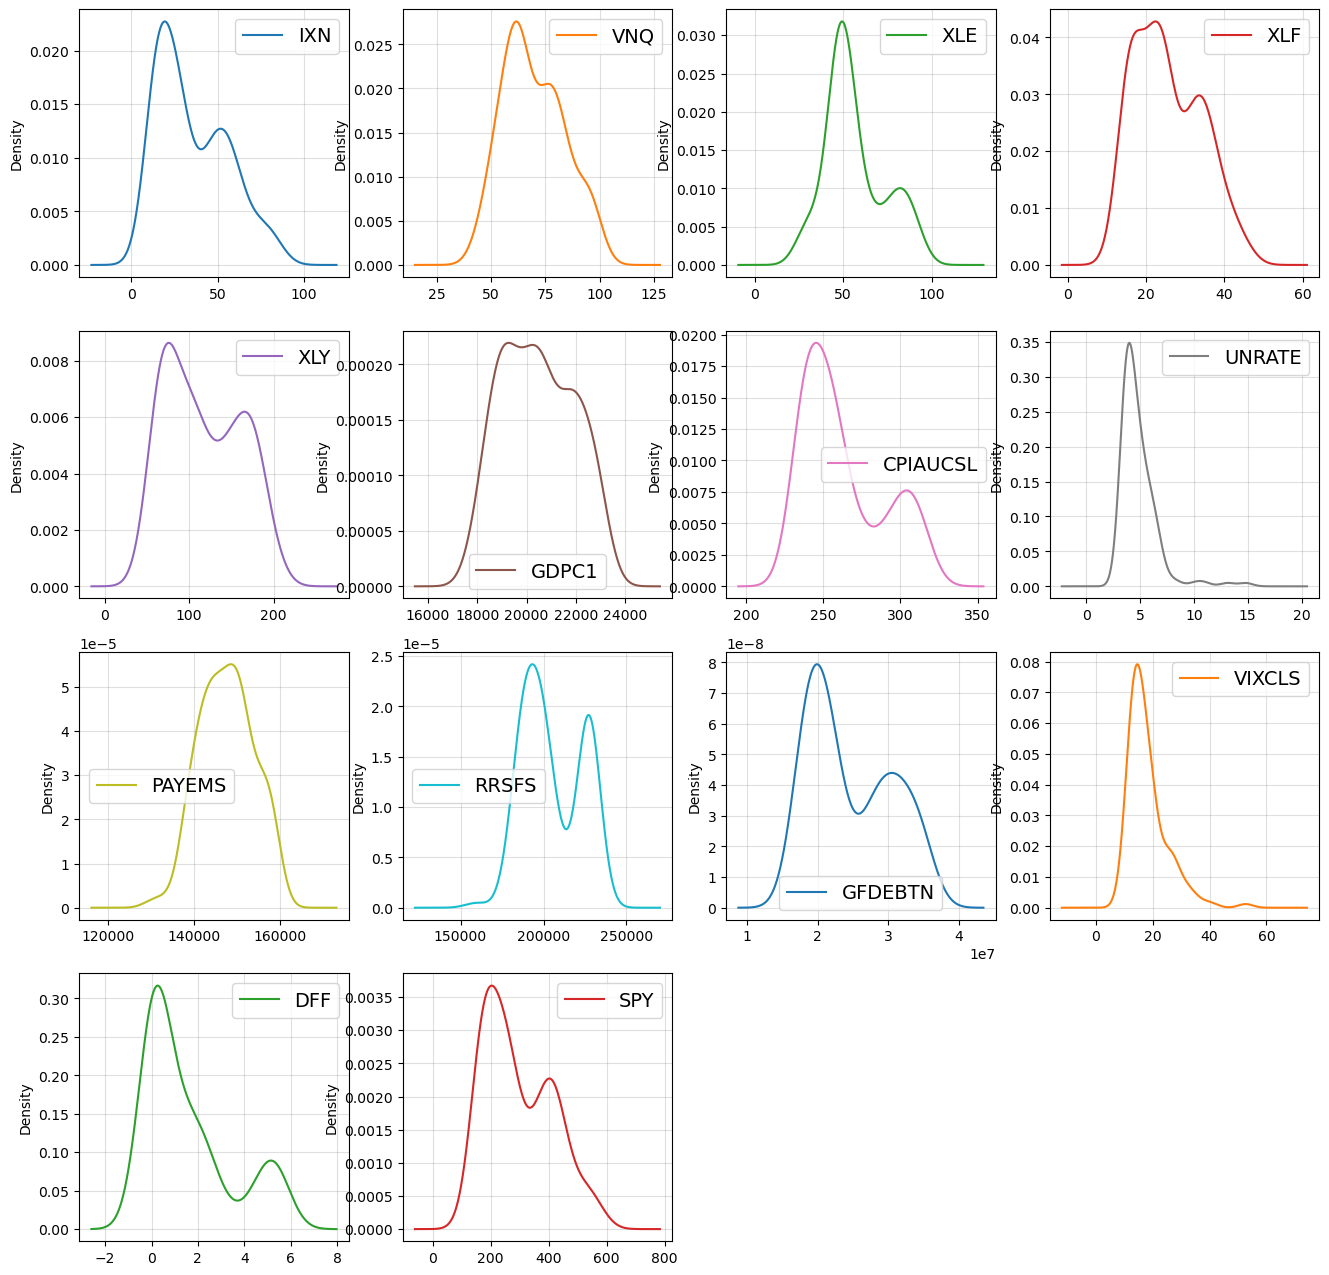

In [16]:
# density plot

(
    monthly_price.
    plot(kind = "density",
         subplots = True,
         layout = (4, 4),
         sharex = False,
         legend = True,
         figsize = [16, 16]
        )
)

plt.show()

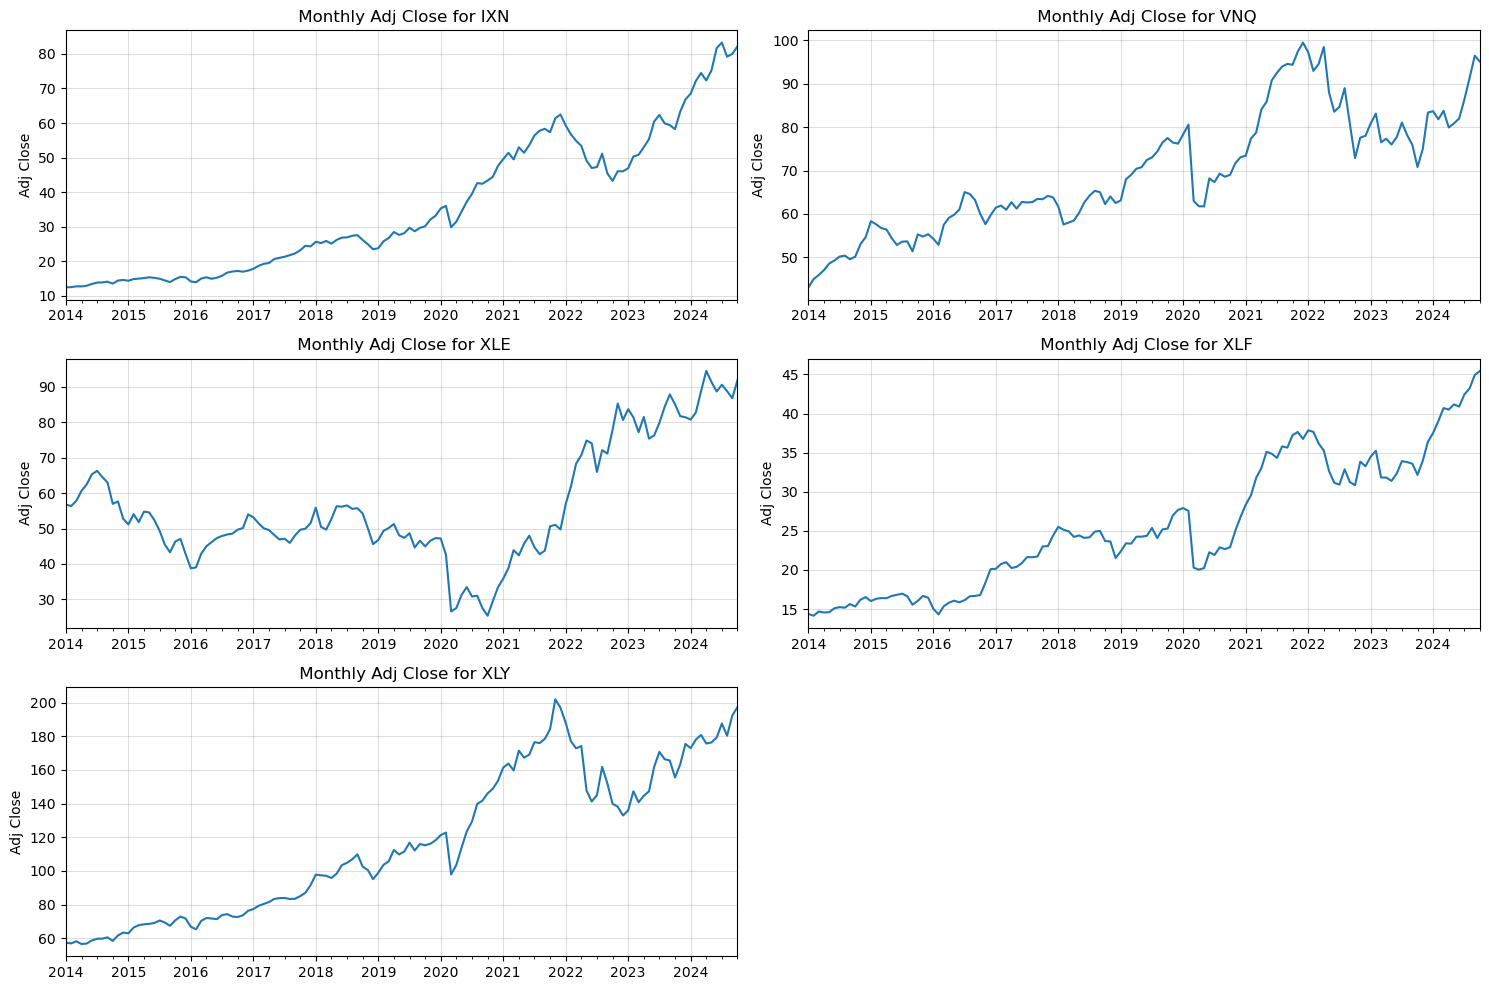

In [17]:
# Monthly Adj Close
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, ticker in enumerate(TICKERS, 1):
    plt.subplot(3, 2, i)
    monthly_price[ticker].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f" Monthly Adj Close for {ticker}")
    
plt.tight_layout()

### FEATURE ENGINEERING

#### LAGGED VALUES

In [89]:
# Calculate returns for each ticker based on 1-month, 2-month, 3-month, and 5-month lags

lagged_price = pd.DataFrame()

for ticker in TICKERS:
    returns = pd.concat(
        [np.log(monthly_price[ticker]).diff(i) for i in [1, 2, 3, 5]], 
        axis=1
    )
    returns.columns = [f"{ticker}_1M_return", f"{ticker}_2M_return", f"{ticker}_3M_return", f"{ticker}_5M_return"]
    returns = returns.dropna()
    
    lagged_price = pd.concat([lagged_price, returns], axis=1)

lagged_price

IXN_1M_return  IXN_2M_return  IXN_3M_return  IXN_5M_return  \
Date                                                                     
2014-06-30       0.038519       0.054627       0.053102       0.076855   
2014-07-31       0.028587       0.067106       0.083214       0.100006   
2014-08-31       0.003527       0.032114       0.070633       0.085216   
2014-09-30       0.015527       0.019054       0.047641       0.102268   
2014-10-31      -0.040922      -0.025395      -0.021868       0.045238   
...                   ...            ...            ...            ...   
2024-06-30       0.082388       0.121556       0.092422       0.176018   
2024-07-31       0.019346       0.101734       0.140902       0.143133   
2024-08-31      -0.050483      -0.031137       0.051251       0.061286   
2024-09-30       0.010511      -0.039972      -0.020625       0.100931   
2024-10-31       0.026940       0.037451      -0.013032       0.088703   

            VNQ_1M_return  VNQ_2M_return  VNQ_3M_return  VNQ_5M_return  \
Date                                                                     
2014-06-30       0.014231       0.045828       0.069889       0.134246   
2014-07-31       0.018132       0.032363       0.063961       0.109363   
2014-08-31       0.004492       0.022624       0.036855       0.092513   
2014-09-30      -0.016911      -0.012419       0.005713       0.051542   
2014-10-31       0.012305      -0.004606      -0.000114       0.032249   
...                   ...            ...            ...            ...   
2024-06-30       0.014085       0.025742      -0.021045      -0.019996   
2024-07-31       0.051902       0.065986       0.077644       0.054238   
2024-08-31       0.055796       0.107698       0.121783       0.086653   
2024-09-30       0.054499       0.110295       0.162197       0.187939   
2024-10-31      -0.014448       0.040051       0.095847       0.161833   

            XLE_1M_return  XLE_2M_return  XLE_3M_return  XLE_5M_return  \
Date                                                                     
2014-06-30       0.044442       0.074296       0.122048       0.140157   
2014-07-31       0.014491       0.058933       0.088787       0.162502   
2014-08-31      -0.026617      -0.012126       0.032316       0.109922   
2014-09-30      -0.024271      -0.050888      -0.036397       0.037899   
2014-10-31      -0.100314      -0.124586      -0.151202      -0.092270   
...                   ...            ...            ...            ...   
2024-06-30      -0.029892      -0.063495      -0.001156       0.093803   
2024-07-31       0.021351      -0.008541      -0.042144       0.090472   
2024-08-31      -0.020254       0.001097      -0.028795      -0.000059   
2024-09-30      -0.022620      -0.042875      -0.021523      -0.085018   
2024-10-31       0.057274       0.034654       0.014399       0.005859   

            XLF_1M_return  XLF_2M_return  XLF_3M_return  XLF_5M_return  \
Date                                                                     
2014-06-30       0.033739       0.036805       0.027582       0.049688   
2014-07-31       0.009416       0.043155       0.046221       0.074571   
2014-08-31      -0.004295       0.005121       0.038860       0.032703   
2014-09-30       0.029656       0.025361       0.034777       0.071582   
2014-10-31      -0.019868       0.009788       0.005493       0.048648   
...                   ...            ...            ...            ...   
2024-06-30      -0.006627       0.009505       0.004985       0.086085   
2024-07-31       0.036912       0.030285       0.046418       0.083383   
2024-08-31       0.018129       0.055041       0.048414       0.060026   
2024-09-30       0.039159       0.057287       0.094200       0.103705   
2024-10-31       0.011407       0.050566       0.068695       0.098980   

            XLY_1M_return  XLY_2M_return  XLY_3M_return  XLY_5M_return  
Date                                                                    
2014-06-30    

#### TECHNICAL INDICATORS

In [90]:
# Initialize a new DataFrame to store technical indicators
tech_indicators = pd.DataFrame(index=monthly_price.index)

# Calculate moving averages and store in tech_indicators DataFrame
for ticker in TICKERS:
    tech_indicators[f'{ticker}_MA_2'] = monthly_price[ticker].rolling(window=2).mean()
    tech_indicators[f'{ticker}_MA_5'] = monthly_price[ticker].rolling(window=5).mean()
    tech_indicators[f'{ticker}_MA_10'] = monthly_price[ticker].rolling(window=10).mean()
    #tech_indicators[f'{ticker}_MA_20'] = monthly_df[ticker].rolling(window=20).mean()

tech_indicators

IXN_MA_2   IXN_MA_5  IXN_MA_10   VNQ_MA_2   VNQ_MA_5  VNQ_MA_10  \
Date                                                                           
2014-01-31        NaN        NaN        NaN        NaN        NaN        NaN   
2014-02-28  12.491297        NaN        NaN  44.036747        NaN        NaN   
2014-03-31  12.641020        NaN        NaN  45.468915        NaN        NaN   
2014-04-30  12.747073        NaN        NaN  46.513643        NaN        NaN   
2014-05-31  12.840766  12.684184        NaN  47.828747  45.937017        NaN   
...               ...        ...        ...        ...        ...        ...   
2024-06-30  78.442010  75.166305  69.202021  81.446063  81.683912  79.717953   
2024-07-31  82.469240  77.387215  71.589803  84.204306  82.596067  80.762448   
2024-08-31  81.217342  78.328447  73.684356  88.867575  84.112496  82.815031   
2024-09-30  79.586006  79.864598  75.355990  93.904384  87.417975  84.967483   
2024-10-31  81.096587  81.259876  76.894936  95.770745  90.259254  86.137242   

             XLE_MA_2   XLE_MA_5  XLE_MA_10   XLF_MA_2   XLF_MA_5  XLF_MA_10  \
Date                                                                           
2014-01-31        NaN        NaN        NaN        NaN        NaN        NaN   
2014-02-28  56.563149        NaN        NaN  14.264943        NaN        NaN   
2014-03-31  57.082001        NaN        NaN  14.425603        NaN        NaN   
2014-04-30  59.237029        NaN        NaN  14.629119        NaN        NaN   
2014-05-31  61.570092  58.817890        NaN  14.584014  14.478899        NaN   
...               ...        ...        ...        ...        ...        ...   
2024-06-30  90.036363  89.227672  86.299009  41.035883  40.464806  37.596658   
2024-07-31  89.647786  90.795140  86.573152  41.668871  41.143820  38.481027   
2024-08-31  89.696465  90.794094  86.942763  42.826005  41.647352  39.586017   
2024-09-30  87.795186  89.253580  87.450562  44.077075  42.532749  40.685194   
2024-10-31  89.360568  89.360967  88.500199  45.197762  43.389490  41.589789   

              XLY_MA_2    XLY_MA_5   XLY_MA_10  
Date                                            
2014-01-31         NaN         NaN         NaN  
2014-02-28   57.208208         NaN         NaN  
2014-03-31   57.629414         NaN         NaN  
2014-04-30   57.443516         NaN         NaN  
2014-05-31   56.772745   57.245247         NaN  
...                ...         ...         ...  
2024-06-30  177.768085  177.978969  172.260785  
2024-07-31  183.377403  179.881920  174.455093  
2024-08-31  183.894170  179.793510  176.931791  
2024-09-30  186.272825  183.119244  179.824426  
2024-10-31  194.783631  187.319202  182.014410  

[130 rows x 15 columns]

### FINAL DATASET

In [91]:
# Drop Nan values
monthly_df = pd.concat([monthly_price, lagged_price, tech_indicators], axis=1)


In [92]:
# Remove NaN
monthly_df = monthly_df.dropna()

In [93]:
monthly_df

IXN        VNQ        XLE        XLF         XLY  \
Date                                                                 
2014-10-31  13.543203  50.176653  56.981255  15.334509   58.482711   
2014-11-30  14.428564  53.058601  57.640815  16.202291   61.718113   
2014-12-31  14.608572  54.650249  52.779409  16.541759   63.436345   
2015-01-31  14.374988  58.327030  51.157337  16.023729   62.985808   
2015-02-28  14.858934  57.633469  54.065099  16.314701   66.392606   
...               ...        ...        ...        ...         ...   
2024-06-30  81.671523  82.019629  88.690768  40.899914  179.240408   
2024-07-31  83.266957  86.388983  90.604804  42.437828  187.514398   
2024-08-31  79.167727  91.346167  88.788127  43.214182  180.273941   
2024-09-30  80.004285  96.462601  86.802246  44.939969  192.271708   
2024-10-31  82.188889  95.078888  91.918889  45.455556  197.295554   

                   GDPC1    CPIAUCSL    UNRATE         PAYEMS          RRSFS  \
Date                                                                           
2014-10-31  18470.350130  237.474957  5.891304  139574.434783  184663.565217   
2014-11-30  18500.031000  237.430000  5.700000  139804.000000  185358.000000   
2014-12-31  18557.975348  236.951217  5.791304  140100.086957  186168.652174   
2015-01-31  18611.091000  236.252000  5.600000  140366.000000  185611.000000   
2015-02-28  18666.621000  234.747000  5.700000  140562.000000  185785.000000   
...                  ...         ...       ...            ...            ...   
2024-06-30  22924.863000  313.225000  4.000000  158430.000000  224857.000000   
2024-07-31  22924.863000  313.070087  4.108696  158551.869565  224454.652174   
2024-08-31  22924.863000  313.534000  4.300000  158637.000000  226581.000000   
2024-09-30  22924.863000  314.121000  4.200000  158779.000000  226274.000000   
2024-10-31  22924.863000  314.121000  4.200000  158779.000000  226274.000000   

            ...  VNQ_MA_10   XLE_MA_2   XLE_MA_5  XLE_MA_10   XLF_MA_2  \
Date        ...                                                          
2014-10-31  ...  47.929612  59.987539  63.225565  61.021727  15.488366   
2014-11-30  ...  48.926496  57.311035  61.687956  61.107282  15.768400   
2014-12-31  ...  49.893148  55.210112  58.987354  60.751120  16.372025   
2015-01-31  ...  51.130441  51.968373  56.310528  60.084557  16.282744   
2015-02-28  ...  52.186469  52.611218  54.524783  59.425958  16.169215   
...         ...        ...        ...        ...        ...        ...   
2024-06-30  ...  79.717953  90.036363  89.227672  86.299009  41.035883   
2024-07-31  ...  80.762448  89.647786  90.795140  86.573152  41.668871   
2024-08-31  ...  82.815031  89.696465  90.794094  86.942763  42.826005   
2024-09-30  ...  84.967483  87.795186  89.253580  87.450562  44.077075   
2024-10-31  ...  86.137242  89.360568  89.360967  88.500199  45.197762   

             XLF_MA_5  XLF_MA_10    XLY_MA_2    XLY_MA_5   XLY_MA_10  
Date                                                                  
2014-10-31  15.303992  14.891446   59.536051   59.490490   58.367869  
2014-11-30  15.522935  15.074149   60.100412   60.077297   58.797488  
2014-12-31  15.781186  15.312862   62.577229   60.812733   59.441673  
2015-01-31  15.948902  15.445577   63.211077   61.442474   59.913821  
2015-02-28  16.083398  15.620881   64.689207   62.603116   60.890811  
...               ...        ...         ...         ...         ...  
2024-06-30  40.464806  37.596658  177.768085  177.978969  172.260785  
2024-07-31  41.143820  38.481027  183.377403  179.881920  174.455093  
2024-08-31  41.647352  39.586017  183.894170  179.793510  176.931791  
2024-09-30  42.532749  40.685194  186.272825  183.119244  179.824426  
2024-10-31  43.389490  41.589789  194.783631  187.319202  182.014410  

[121 rows x 49 columns]

<Axes: title={'center': 'A Heatmap for Correlation Matrix'}>

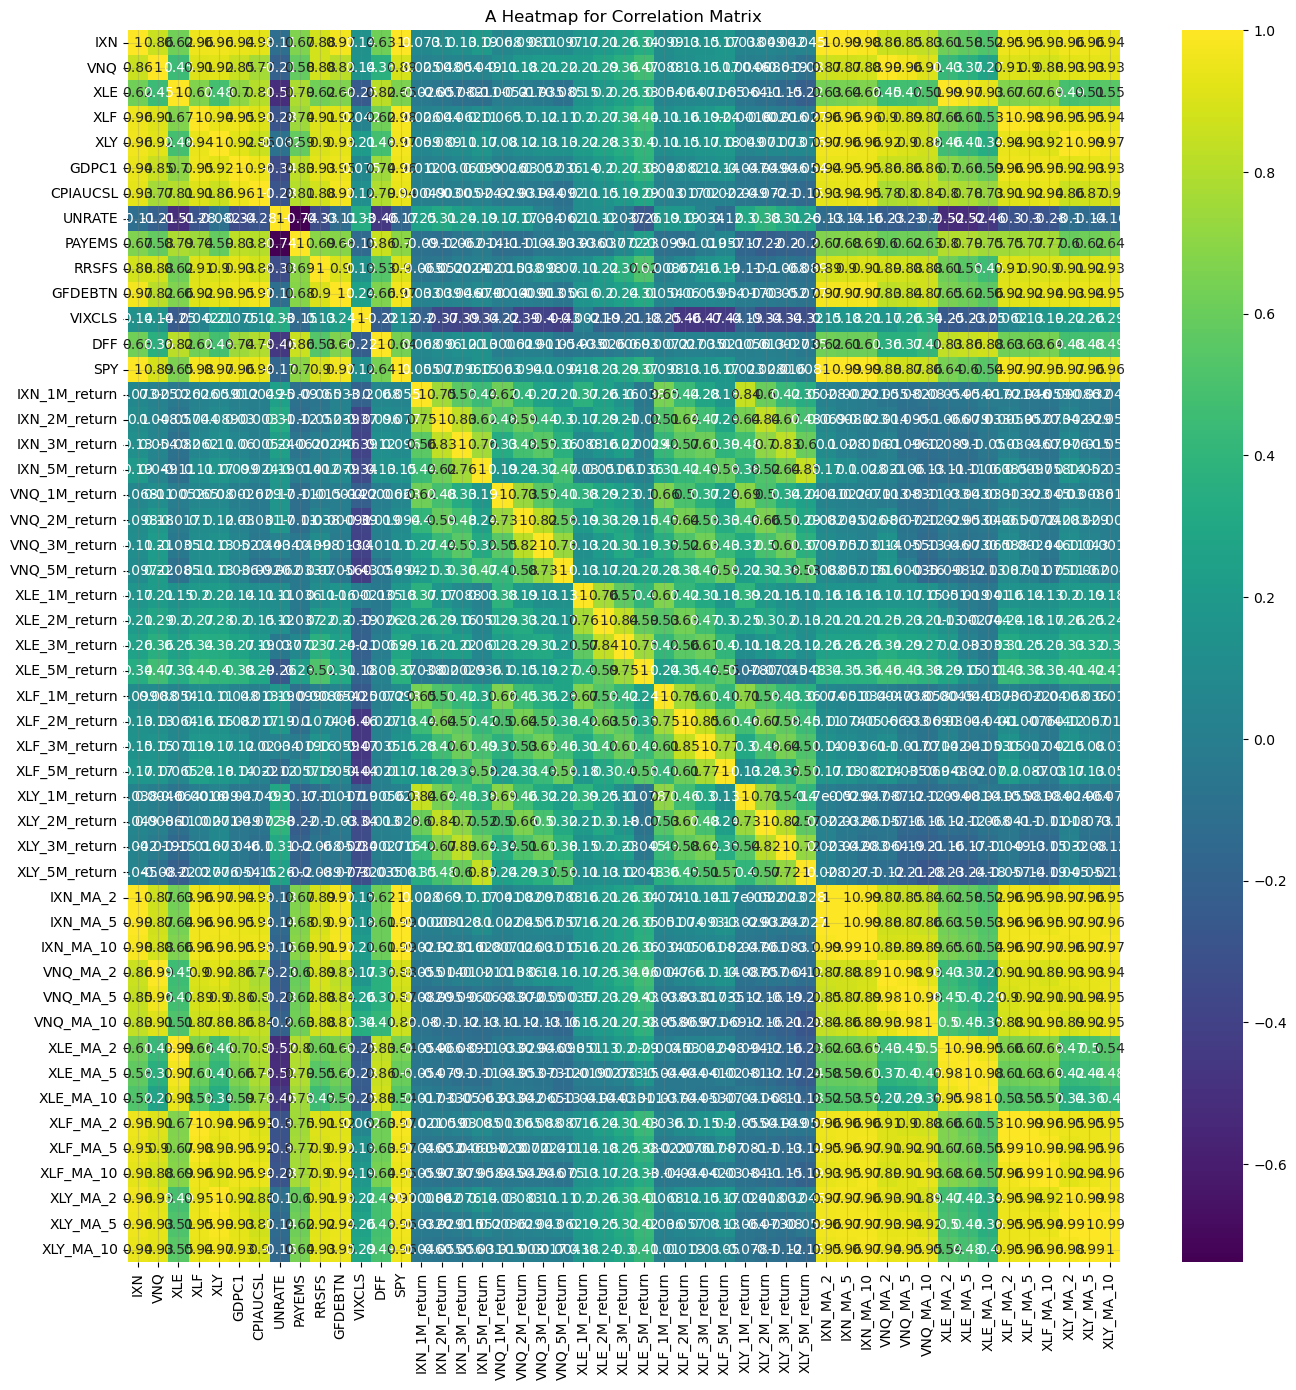

In [94]:
corr = monthly_df.corr()

plt.figure(figsize = [16, 16]
          )

plt.title("A Heatmap for Correlation Matrix")

sns \
    .heatmap(corr,
             annot = True,
             cmap = "viridis")

In [95]:
#SET DATAFRAME FOR EACH TICKERS

IXN_pattern = r'^(VNQ|XLE|XLF|XLY)'
IXN_df = monthly_df.loc[:, ~monthly_df.columns.str.contains(IXN_pattern)]

VNQ_pattern = r'^(IXN|XLE|XLF|XLY)'
VNQ_df = monthly_df.loc[:, ~monthly_df.columns.str.contains(VNQ_pattern)]

XLE_pattern = r'^(IXN|VNQ|XLF|XLY)'
XLE_df = monthly_df.loc[:, ~monthly_df.columns.str.contains(XLE_pattern)]

XLF_pattern = r'^(IXN|XLE|VNQ|XLY)'
XLF_df = monthly_df.loc[:, ~monthly_df.columns.str.contains(XLF_pattern)]

XLY_pattern = r'^(IXN|XLE|XLF|VNQ)'
XLY_df = monthly_df.loc[:, ~monthly_df.columns.str.contains(XLY_pattern)]

In [96]:
TICKERS

['IXN', 'VNQ', 'XLE', 'XLF', 'XLY']

### MODEL TRAINING (MONTHLY)

### 1) LINEAR REGRESSION
Using:
- lagged return values of the ticker itself
- SMA of the ticker itself
- macroenocomic data (GDP, etc)
- SPY

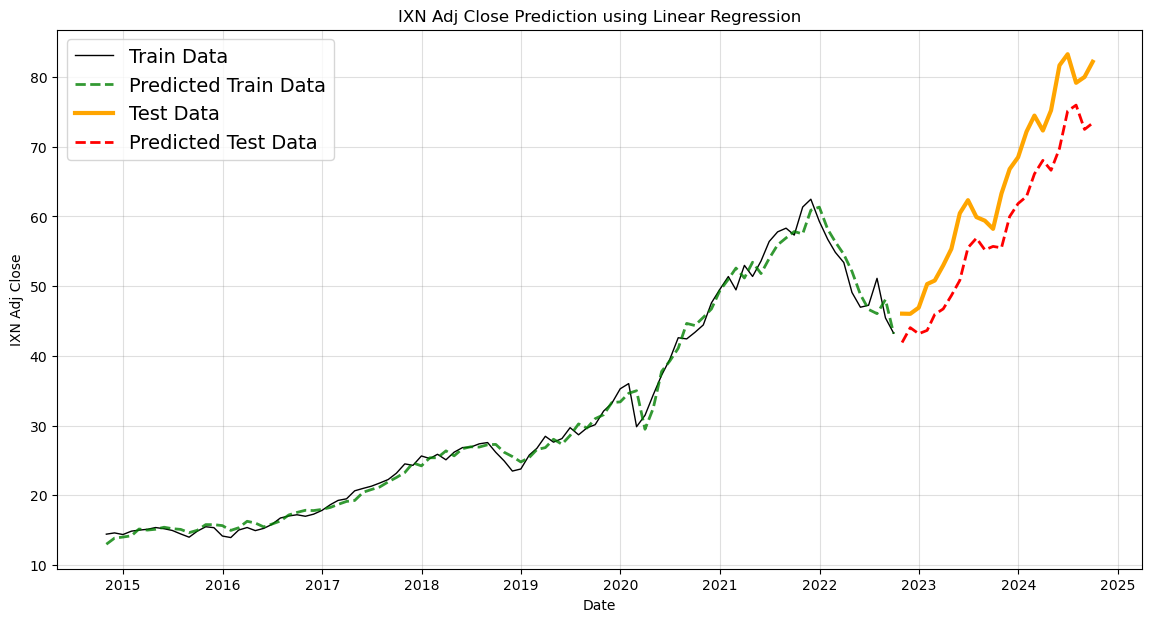

Performance Results for IXN
  Ticker        MSE      RMSE        R²      MAPE
0    IXN  46.281862  6.803077  0.680429  0.097239


Feature Importance for IXN
          Feature  Coefficient  Absolute Coefficient Ticker
10  IXN_1M_return     3.966963              3.966963    IXN
13  IXN_5M_return    -1.275508              1.275508    IXN
0             IXN     0.926504              0.926504    IXN
12  IXN_3M_return    -0.762262              0.762262    IXN
8             DFF    -0.591257              0.591257    IXN


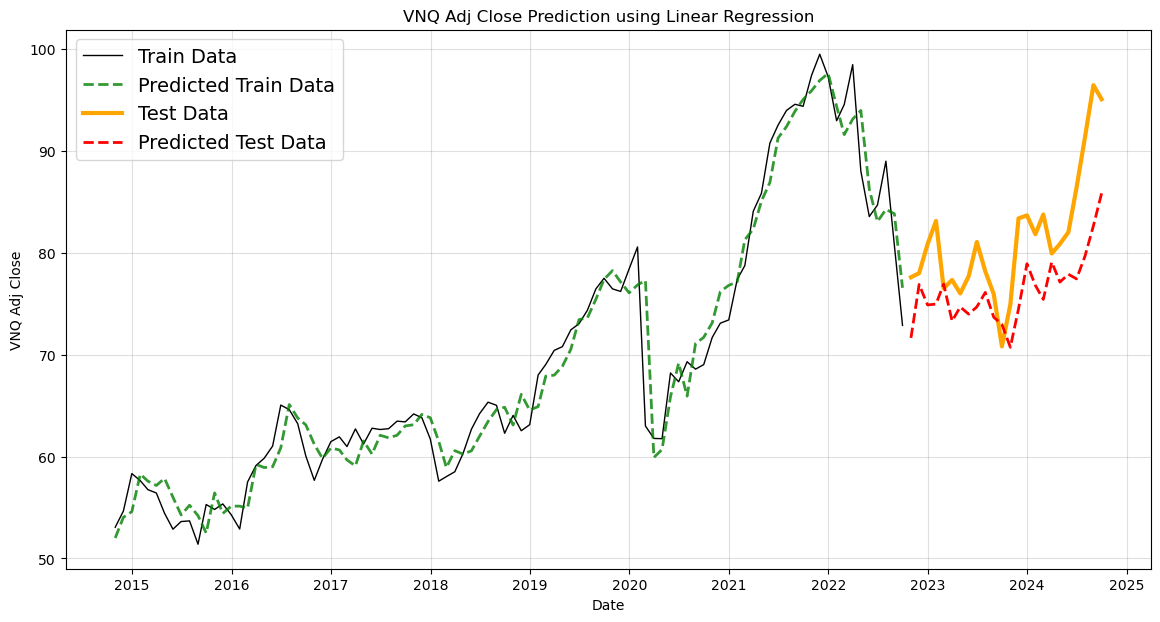

Performance Results for VNQ
  Ticker        MSE      RMSE        R²      MAPE
0    VNQ  40.147706  6.336222 -0.118269  0.062923


Feature Importance for VNQ
          Feature  Coefficient  Absolute Coefficient Ticker
10  VNQ_1M_return    24.147016             24.147016    VNQ
12  VNQ_3M_return    -5.007416              5.007416    VNQ
11  VNQ_2M_return     4.705670              4.705670    VNQ
13  VNQ_5M_return     2.102389              2.102389    VNQ
8             DFF    -1.295294              1.295294    VNQ


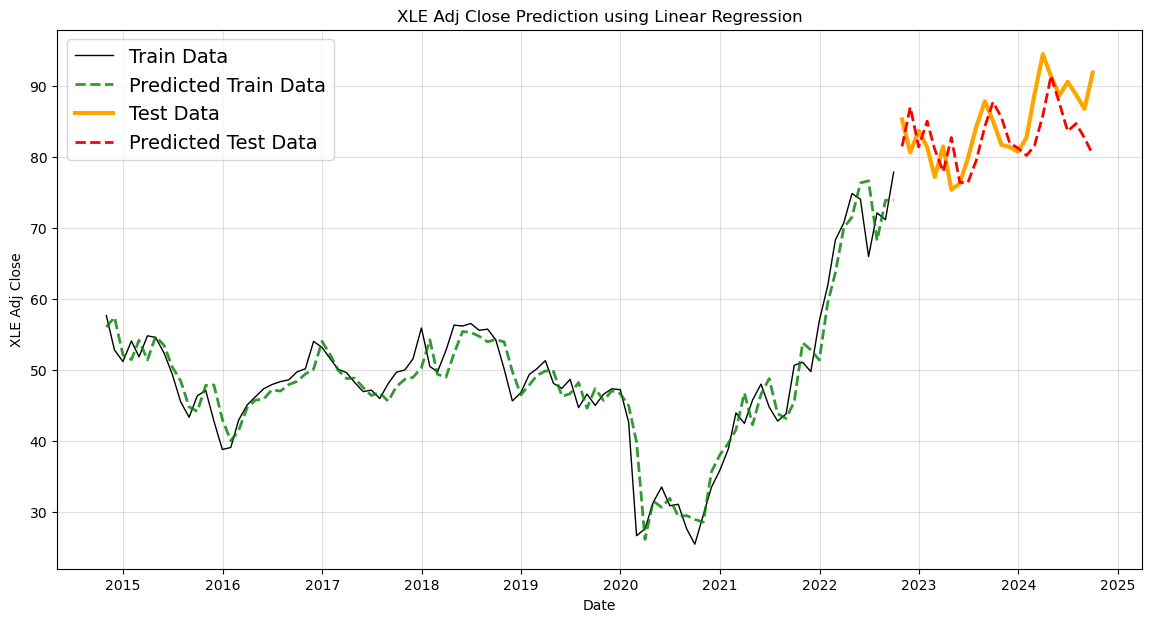

Performance Results for XLE
  Ticker        MSE      RMSE        R²      MAPE
0    XLE  23.940723  4.892926  0.049889  0.047207


Feature Importance for XLE
          Feature  Coefficient  Absolute Coefficient Ticker
10  XLE_1M_return    11.361998             11.361998    XLE
13  XLE_5M_return    -4.716691              4.716691    XLE
3          UNRATE    -2.222221              2.222221    XLE
11  XLE_2M_return    -1.320221              1.320221    XLE
0             XLE     0.832151              0.832151    XLE


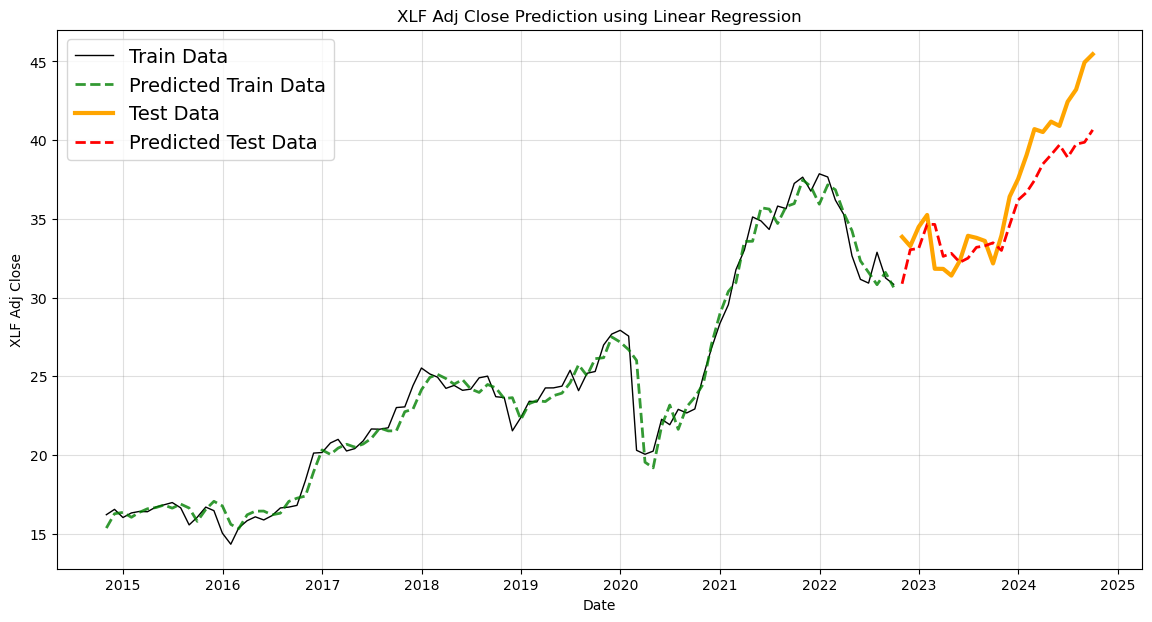

Performance Results for XLF
  Ticker       MSE      RMSE        R²      MAPE
0    XLF  5.480805  2.341112  0.719927  0.049559


Feature Importance for XLF
          Feature  Coefficient  Absolute Coefficient Ticker
10  XLF_1M_return     4.500508              4.500508    XLF
13  XLF_5M_return    -2.499566              2.499566    XLF
12  XLF_3M_return     2.197318              2.197318    XLF
11  XLF_2M_return     0.803624              0.803624    XLF
15       XLF_MA_5     0.798739              0.798739    XLF


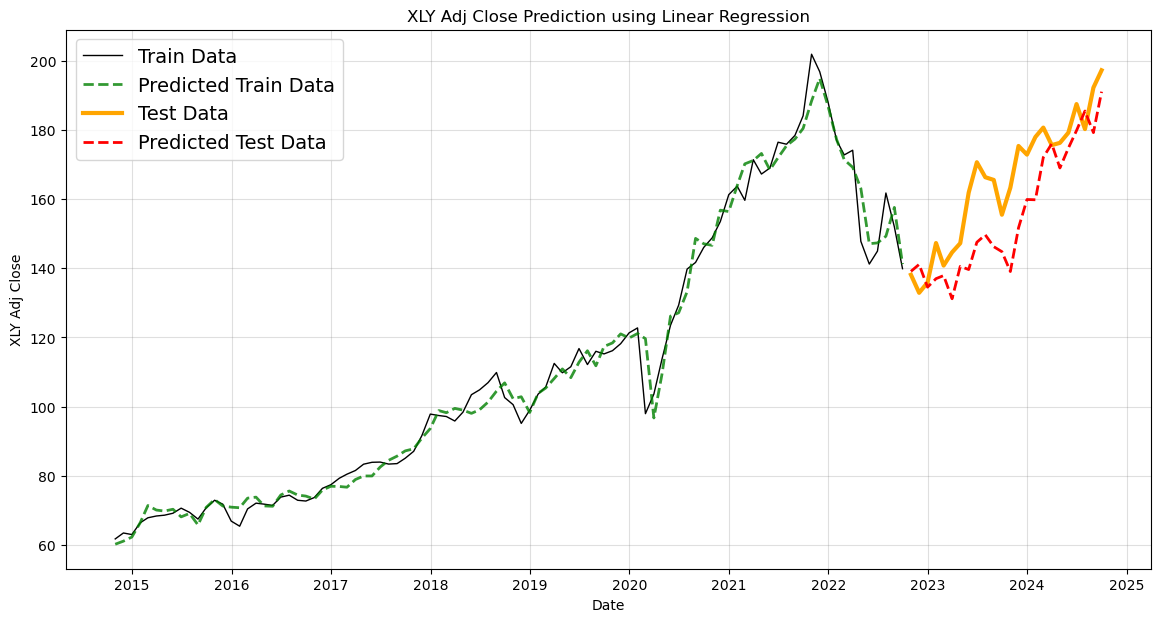

Performance Results for XLY
  Ticker         MSE       RMSE        R²      MAPE
0    XLY  178.962212  13.377676  0.457504  0.067173


Feature Importance for XLY
          Feature  Coefficient  Absolute Coefficient Ticker
10  XLY_1M_return   -52.702742             52.702742    XLY
13  XLY_5M_return    19.786744             19.786744    XLY
12  XLY_3M_return   -15.576811             15.576811    XLY
11  XLY_2M_return    -7.644266              7.644266    XLY
3          UNRATE    -3.042610              3.042610    XLY


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Initialize an empty list to store performance results
performance_results = []
feature_importance_results = []

# Loop through each ticker in TICKERS
for ticker in TICKERS:
    data = globals()[f'{ticker}_df'].copy()
    # Define features and target
    X = data # Drop the current ticker from features
    y = data[ticker].shift(-1).dropna()  # Use the raw target variable
    X = X[:-1]  # Align X with y after shifting

    # Time-based train-test split
    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions for both training and test sets
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, test_predictions)
    mape = mean_absolute_percentage_error(y_test, test_predictions)  # No need for exponentiation

    # Store performance results
    performance_results.append({
        'Ticker': ticker,
        'MSE': mse,
        'RMSE' : rmse,
        'R²': r2,
        'MAPE': mape
    })

    # Coefficient analysis for feature importance
    coefficients = model.coef_
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': coefficients
    })
    feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
    feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)
    feature_importance['Ticker'] = ticker

    # Append feature importance to results list
    feature_importance_results.append(feature_importance)

    # Plotting the predictions for each ticker
    plt.figure(figsize=(14, 7))

    # Plot training data
    plt.plot(y_train.index, y_train, label="Train Data", color="black", linewidth=1, linestyle="-")

    # Plot predictions for training set
    plt.plot(y_train.index, train_predictions, label="Predicted Train Data", color="green", linewidth=2, linestyle="--", alpha=0.8)

    # Plot test data
    plt.plot(y_test.index, y_test, label="Test Data", color="orange", linewidth=3, linestyle="-")

    # Plot predictions for test set
    plt.plot(y_test.index, test_predictions, label="Predicted Test Data", color="red", linewidth=2, linestyle="--")

    # Add labels and legend
    plt.xlabel("Date")
    plt.ylabel(f"{ticker} Adj Close")
    plt.title(f"{ticker} Adj Close Prediction using Linear Regression")
    plt.legend()
    plt.show()

    # Convert performance results to DataFrame for the current ticker
    performance_df = pd.DataFrame(performance_results[-1:], columns=performance_results[-1].keys())
    print("Performance Results for", ticker)
    print(performance_df)
    print("\n")

    # Display feature importance for the current ticker immediately after the plot
    feature_importance_df = feature_importance_results[-1]  # Get the last entry
    print("Feature Importance for", ticker)
    print(feature_importance_df.head(5))


In [98]:
# Combine all feature importance results
all_feature_importance_df = pd.concat(feature_importance_results, ignore_index=True)
all_feature_importance_df.groupby("Ticker").head(7)

Feature  Coefficient  Absolute Coefficient Ticker
0   IXN_1M_return     3.966963              3.966963    IXN
1   IXN_5M_return    -1.275508              1.275508    IXN
2             IXN     0.926504              0.926504    IXN
3   IXN_3M_return    -0.762262              0.762262    IXN
4             DFF    -0.591257              0.591257    IXN
5          UNRATE     0.297732              0.297732    IXN
6        IXN_MA_5     0.280725              0.280725    IXN
17  VNQ_1M_return    24.147016             24.147016    VNQ
18  VNQ_3M_return    -5.007416              5.007416    VNQ
19  VNQ_2M_return     4.705670              4.705670    VNQ
20  VNQ_5M_return     2.102389              2.102389    VNQ
21            DFF    -1.295294              1.295294    VNQ
22       VNQ_MA_5     0.757111              0.757111    VNQ
23      VNQ_MA_10    -0.514261              0.514261    VNQ
34  XLE_1M_return    11.361998             11.361998    XLE
35  XLE_5M_return    -4.716691              4.716691    XLE
36         UNRATE    -2.222221              2.222221    XLE
37  XLE_2M_return    -1.320221              1.320221    XLE
38            XLE     0.832151              0.832151    XLE
39  XLE_3M_return    -0.669371              0.669371    XLE
40            DFF    -0.494690              0.494690    XLE
51  XLF_1M_return     4.500508              4.500508    XLF
52  XLF_5M_return    -2.499566              2.499566    XLF
53  XLF_3M_return     2.197318              2.197318    XLF
54  XLF_2M_return     0.803624              0.803624    XLF
55       XLF_MA_5     0.798739              0.798739    XLF
56            XLF     0.600024              0.600024    XLF
57         UNRATE    -0.543311              0.543311    XLF
68  XLY_1M_return   -52.702742             52.702742    XLY
69  XLY_5M_return    19.786744             19.786744    XLY
70  XLY_3M_return   -15.576811             15.576811    XLY
71  XLY_2M_return    -7.644266              7.644266    XLY
72         UNRATE    -3.042610              3.042610    XLY
73       CPIAUCSL    -1.438127              1.438127    XLY
74            XLY     1.328485              1.328485    XLY

In [99]:
# LR performance results table
LR_performance_df = pd.DataFrame(performance_results)
LR_performance_df

Ticker         MSE       RMSE        R²      MAPE
0    IXN   46.281862   6.803077  0.680429  0.097239
1    VNQ   40.147706   6.336222 -0.118269  0.062923
2    XLE   23.940723   4.892926  0.049889  0.047207
3    XLF    5.480805   2.341112  0.719927  0.049559
4    XLY  178.962212  13.377676  0.457504  0.067173

In [100]:
LR_Result = LR_performance_df[["MSE", "RMSE","R²", "MAPE"]].mean().to_frame('LR').T
LR_Result

MSE      RMSE        R²     MAPE
LR  58.962661  6.750203  0.357896  0.06482

### 2) ElasticNet
ElasticNet()

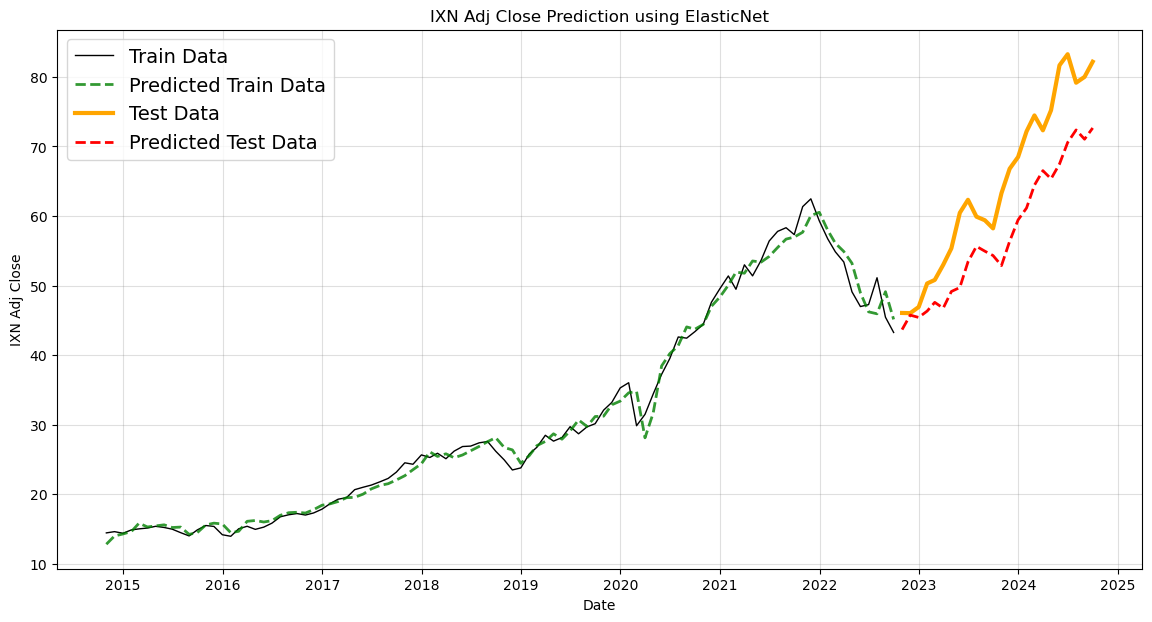

Performance Results for IXN
  Ticker        MSE     RMSE     R²      MAPE
0    IXN  66.329941  8.14432  0.542  0.107837


Feature Importance for IXN
     Feature  Coefficient  Absolute Coefficient Ticker
2   CPIAUCSL    -0.241367              0.241367    IXN
0        IXN     0.175558              0.175558    IXN
9        SPY     0.115956              0.115956    IXN
7     VIXCLS     0.065733              0.065733    IXN
14  IXN_MA_2     0.012495              0.012495    IXN


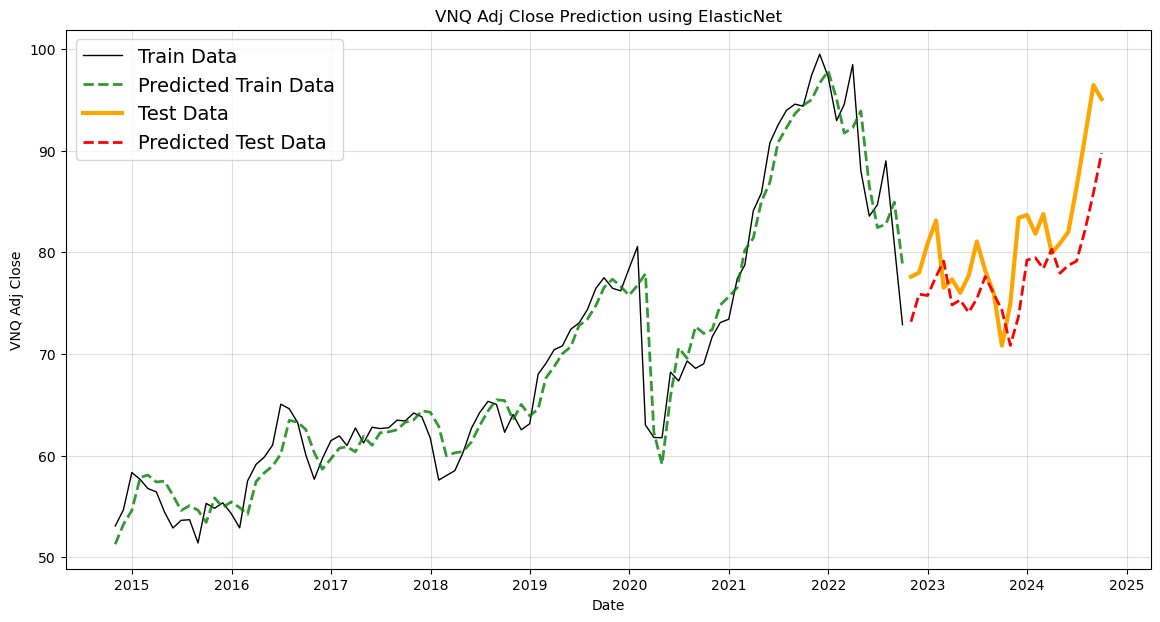

Performance Results for VNQ
  Ticker        MSE      RMSE       R²      MAPE
0    VNQ  25.597158  5.059363  0.28702  0.050482


Feature Importance for VNQ
      Feature  Coefficient  Absolute Coefficient Ticker
0         VNQ     0.682081              0.682081    VNQ
15   VNQ_MA_5     0.250676              0.250676    VNQ
16  VNQ_MA_10    -0.094105              0.094105    VNQ
2    CPIAUCSL    -0.062738              0.062738    VNQ
7      VIXCLS     0.048732              0.048732    VNQ


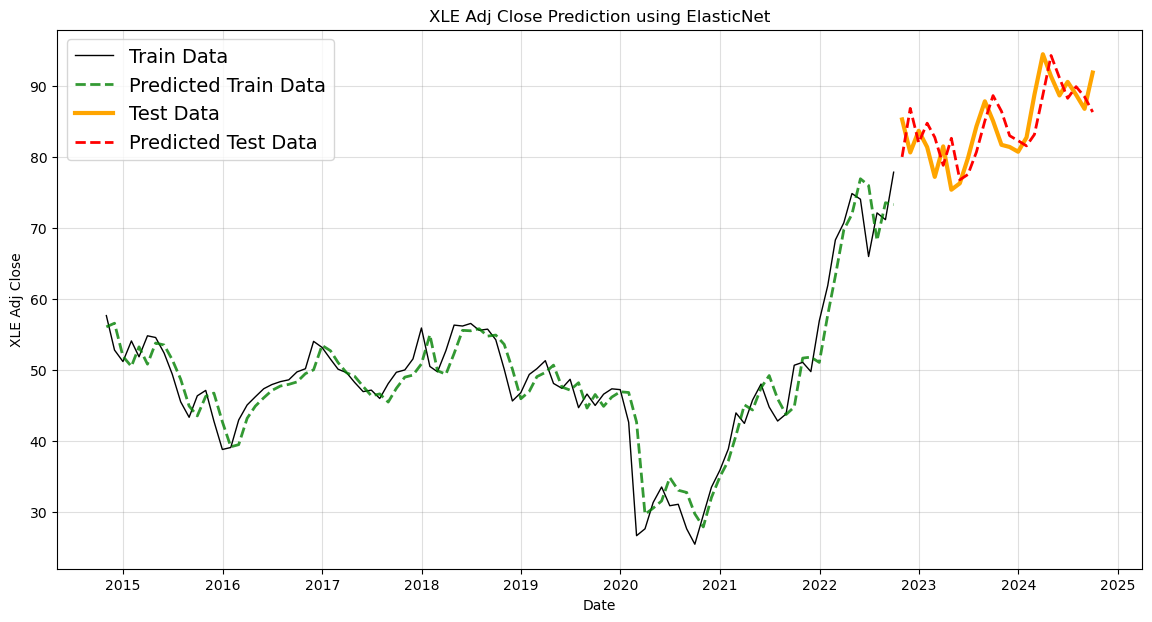

Performance Results for XLE
  Ticker        MSE      RMSE        R²      MAPE
0    XLE  14.974724  3.869719  0.405713  0.040315


Feature Importance for XLE
  Feature  Coefficient  Absolute Coefficient Ticker
0     XLE     0.960718              0.960718    XLE
7  VIXCLS     0.032004              0.032004    XLE
9     SPY    -0.013579              0.013579    XLE
1   GDPC1    -0.000817              0.000817    XLE
4  PAYEMS     0.000060              0.000060    XLE


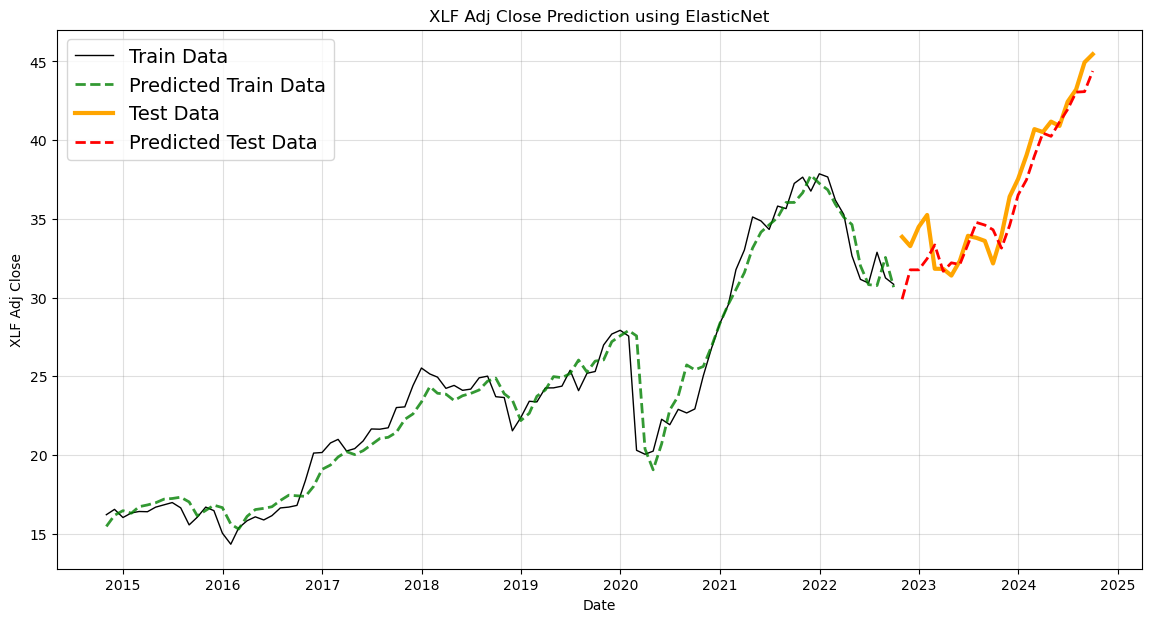

Performance Results for XLF
  Ticker      MSE      RMSE       R²      MAPE
0    XLF  2.46318  1.569452  0.87413  0.034994


Feature Importance for XLF
     Feature  Coefficient  Absolute Coefficient Ticker
0        XLF     0.289511              0.289511    XLF
14  XLF_MA_2     0.079253              0.079253    XLF
9        SPY     0.048612              0.048612    XLF
1      GDPC1     0.002356              0.002356    XLF
4     PAYEMS    -0.000129              0.000129    XLF


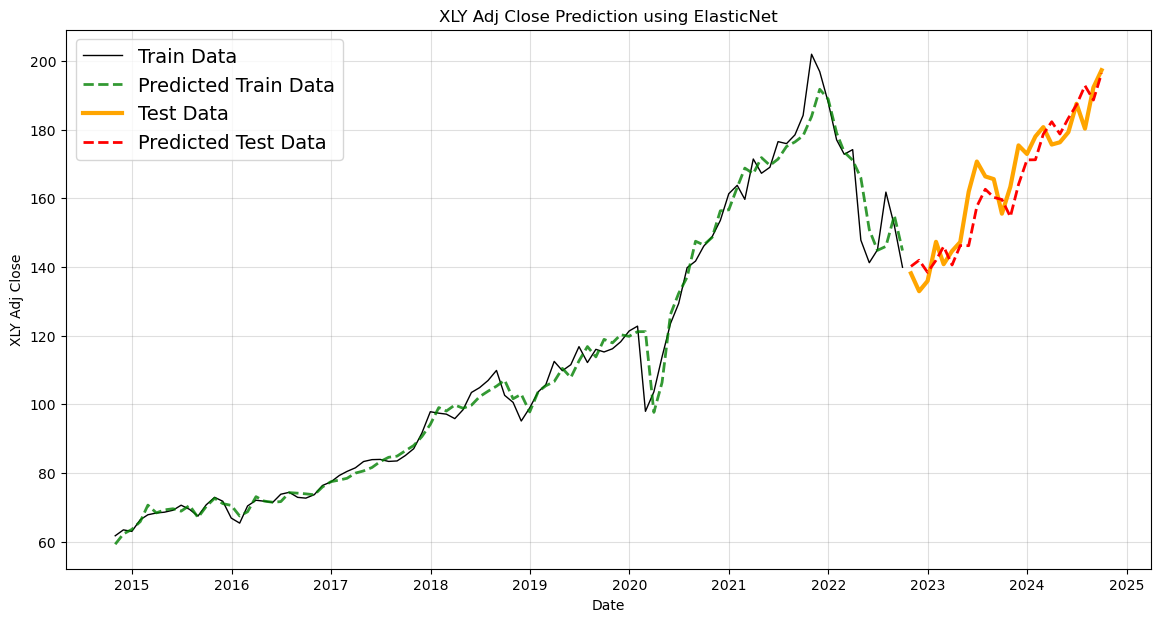

Performance Results for XLY
  Ticker        MSE      RMSE        R²      MAPE
0    XLY  47.413756  6.885765  0.856273  0.033777


Feature Importance for XLY
     Feature  Coefficient  Absolute Coefficient Ticker
2   CPIAUCSL    -0.705796              0.705796    XLY
0        XLY     0.496934              0.496934    XLY
7     VIXCLS     0.337900              0.337900    XLY
14  XLY_MA_2    -0.218945              0.218945    XLY
9        SPY     0.211420              0.211420    XLY


In [101]:
from sklearn.linear_model import ElasticNet

performance_results = []
feature_importance_results = []

# Loop through each ticker in TICKERS
for ticker in TICKERS:
    data = globals()[f'{ticker}_df'].copy()
    # Define features and target
    X = data
    y = data[ticker].shift(-1).dropna()  # Use the raw target variable
    X = X[:-1]  # Align X with y after shifting

    # Time-based train-test split
    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize and train the model
    model = ElasticNet()
    model.fit(X_train, y_train)

    # Make predictions for both training and test sets
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, test_predictions)
    mape = mean_absolute_percentage_error(y_test, test_predictions)  # No need for exponentiation

    # Store performance results
    performance_results.append({
        'Ticker': ticker,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape
    })

    # Coefficient analysis for feature importance
    coefficients = model.coef_
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': coefficients
    })
    feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
    feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)
    feature_importance['Ticker'] = ticker
    feature_importance_results.append(feature_importance)

    # Plotting the predictions for each ticker
    plt.figure(figsize=(14, 7))

    # Plot training data
    plt.plot(y_train.index, y_train, label="Train Data", color="black", linewidth=1, linestyle="-")

    # Plot predictions for training set
    plt.plot(y_train.index, train_predictions, label="Predicted Train Data", color="green", linewidth=2, linestyle="--", alpha=0.8)

    # Plot test data
    plt.plot(y_test.index, y_test, label="Test Data", color="orange", linewidth=3, linestyle="-")

    # Plot predictions for test set
    plt.plot(y_test.index, test_predictions, label="Predicted Test Data", color="red", linewidth=2, linestyle="--")

    # Add labels and legend
    plt.xlabel("Date")
    plt.ylabel(f"{ticker} Adj Close")
    plt.title(f"{ticker} Adj Close Prediction using ElasticNet")
    plt.legend()
    plt.show()

    # Convert performance results to DataFrame for the current ticker
    performance_df = pd.DataFrame(performance_results[-1:], columns=performance_results[-1].keys())
    print("Performance Results for", ticker)
    print(performance_df)
    print("\n")

    # Display feature importance for the current ticker
    feature_importance_df = feature_importance_results[-1]  # Get the last entry
    print("Feature Importance for", ticker)
    print(feature_importance_df.head(5))


In [102]:
# EN performance results
EN_performance_df = pd.DataFrame(performance_results)
EN_performance_df

Ticker        MSE      RMSE        R²      MAPE
0    IXN  66.329941  8.144320  0.542000  0.107837
1    VNQ  25.597158  5.059363  0.287020  0.050482
2    XLE  14.974724  3.869719  0.405713  0.040315
3    XLF   2.463180  1.569452  0.874130  0.034994
4    XLY  47.413756  6.885765  0.856273  0.033777

In [103]:
EN_Result = EN_performance_df[["MSE", "RMSE","R²", "MAPE"]].mean().to_frame('EN').T
EN_Result

MSE      RMSE        R²      MAPE
EN  31.355752  5.105724  0.593027  0.053481

### 3) Random Forest Regressor
RandomForestRegressor()

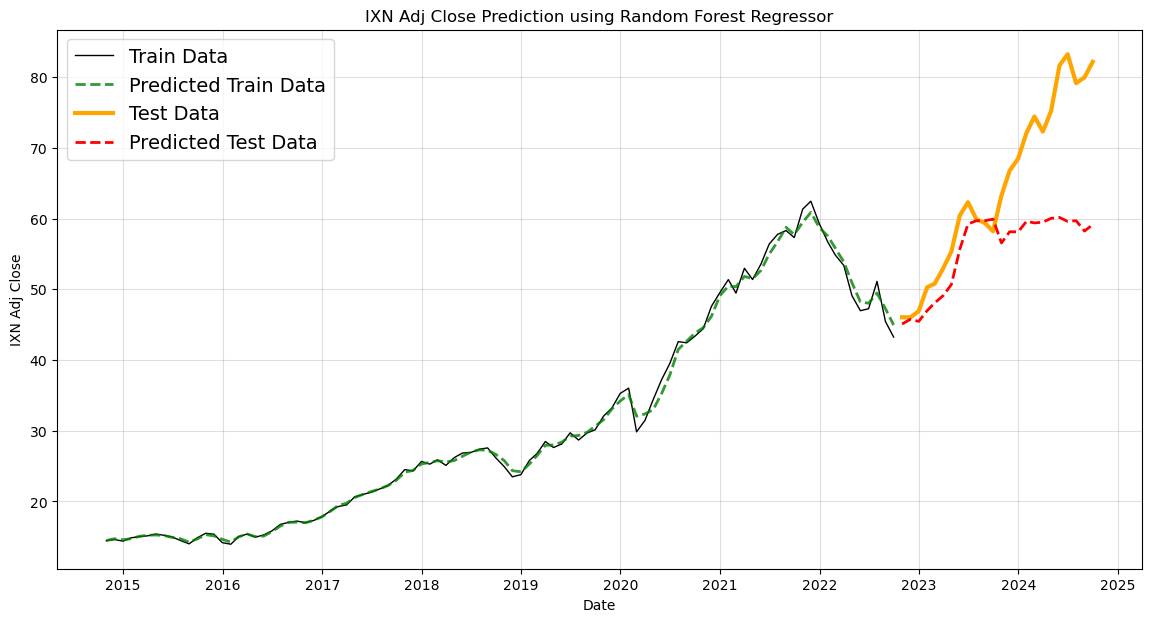

Performance Results for IXN
  Ticker  Average CV MSE         MSE       RMSE        R²      MAPE
0    IXN        4.527238  145.923409  12.079876 -0.007584  0.124479


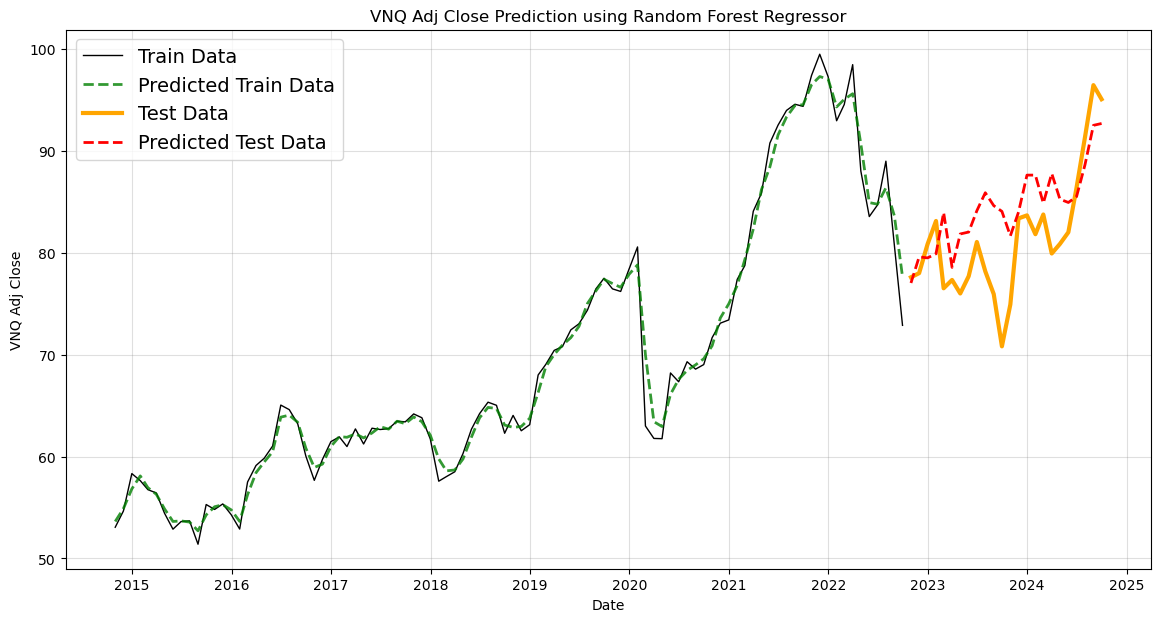

Performance Results for VNQ
  Ticker  Average CV MSE       MSE      RMSE        R²      MAPE
0    VNQ       10.181128  27.48796  5.242896  0.234354  0.053719


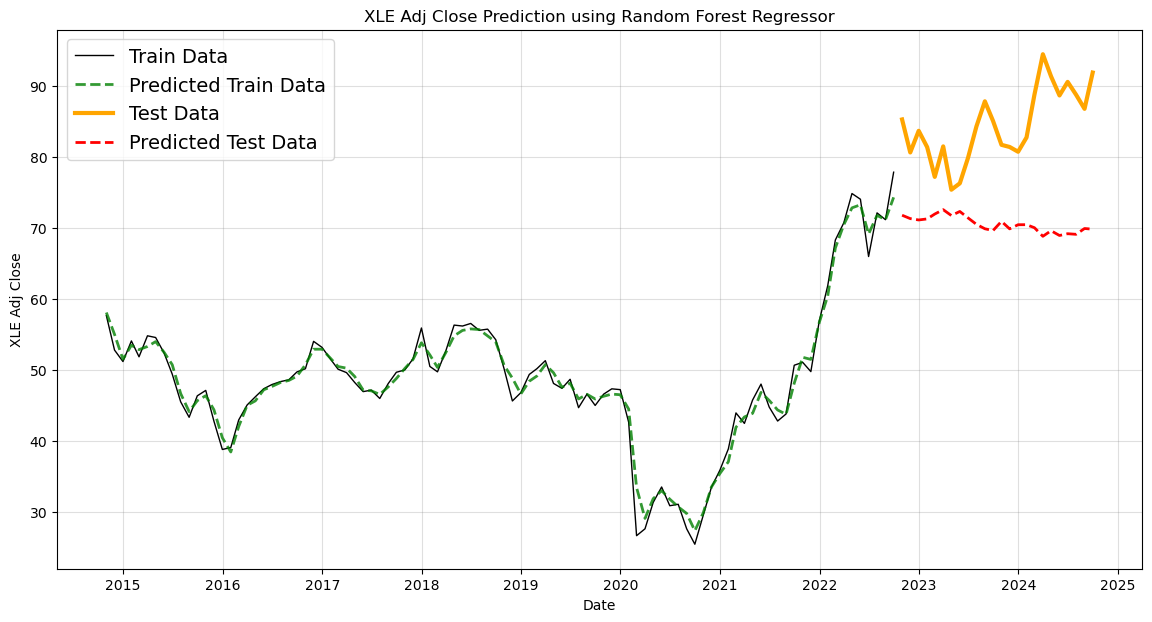

Performance Results for XLE
  Ticker  Average CV MSE         MSE       RMSE        R²      MAPE
0    XLE       13.074943  228.851413  15.127836 -8.082193  0.161215


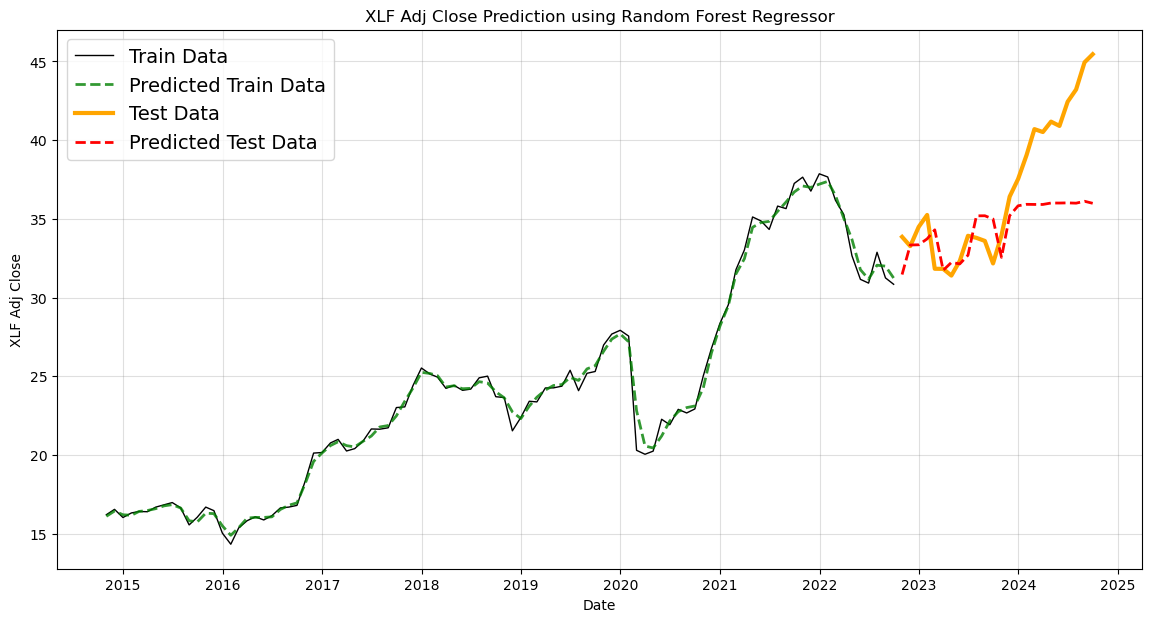

Performance Results for XLF
  Ticker  Average CV MSE        MSE      RMSE        R²     MAPE
0    XLF        1.808772  16.750345  4.092719  0.144046  0.07809


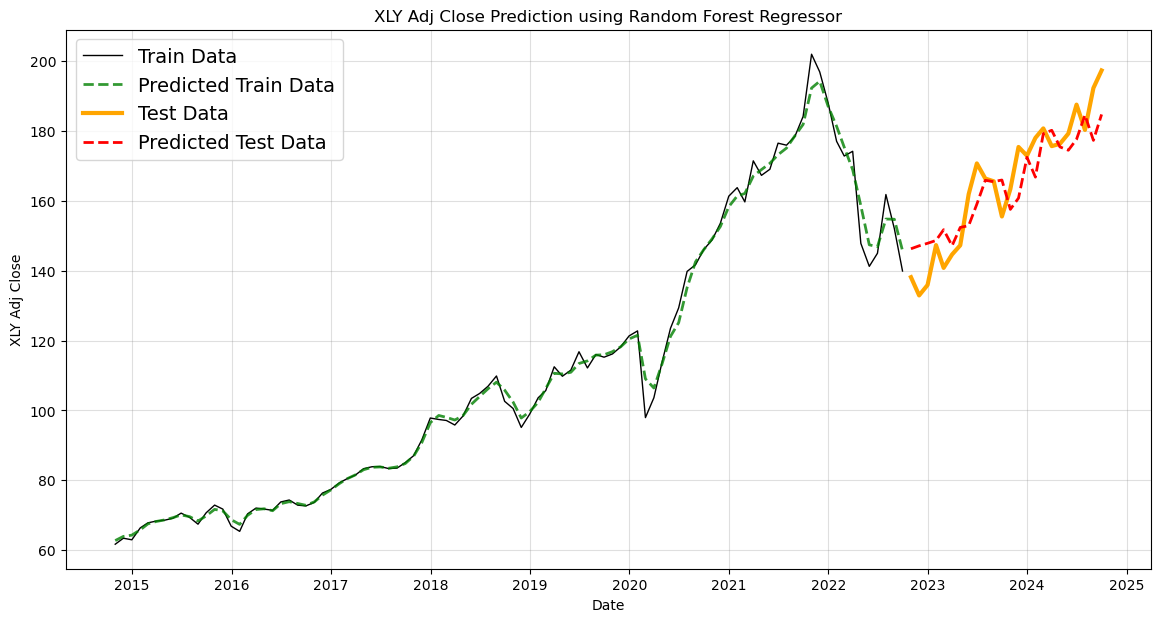

Performance Results for XLY
  Ticker  Average CV MSE        MSE      RMSE        R²      MAPE
0    XLY       59.135825  75.362988  8.681186  0.771549  0.043968


In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# Initialize an empty list to store performance results
performance_results = []
feature_importance_results = []

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = 'neg_mean_squared_error'  # Use negative MSE for scoring

# Loop through each ticker in TICKERS
for ticker in TICKERS:
    data = globals()[f'{ticker}_df'].copy()
    
    # Define features and target
    X = data  # Drop the current ticker from features
    y = data[ticker].shift(-1).dropna()  # Use the raw target variable
    X = X[:-1]  # Align X with y after shifting

    # Time-based train-test split
    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize and train the model
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    # Perform cross-validation
    cv_results = -cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)  # Negate for positive MSE
    average_cv_mse = np.mean(cv_results)

    # Make predictions for both training and test sets
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, test_predictions)
    mape = mean_absolute_percentage_error(y_test, test_predictions)  # No need for exponentiation

    # Store performance results
    performance_results.append({
        'Ticker': ticker,
        'Average CV MSE': average_cv_mse,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape
    })

    # Plotting the predictions for each ticker
    plt.figure(figsize=(14, 7))

    # Plot training data
    plt.plot(y_train.index, y_train, label="Train Data", color="black", linewidth=1, linestyle="-")

    # Plot predictions for training set
    plt.plot(y_train.index, train_predictions, label="Predicted Train Data", color="green", linewidth=2, linestyle="--", alpha=0.8)

    # Plot test data
    plt.plot(y_test.index, y_test, label="Test Data", color="orange", linewidth=3, linestyle="-")

    # Plot predictions for test set
    plt.plot(y_test.index, test_predictions, label="Predicted Test Data", color="red", linewidth=2, linestyle="--")

    # Add labels and legend
    plt.xlabel("Date")
    plt.ylabel(f"{ticker} Adj Close")
    plt.title(f"{ticker} Adj Close Prediction using Random Forest Regressor")
    plt.legend()
    plt.show()

    # Convert performance results to DataFrame for the current ticker
    performance_df = pd.DataFrame(performance_results[-1:], columns=performance_results[-1].keys())
    print("Performance Results for", ticker)
    print(performance_df)
    


In [105]:
# RFR performance resultss
RFR_performance_df = pd.DataFrame(performance_results)
RFR_performance_df

Ticker  Average CV MSE         MSE       RMSE        R²      MAPE
0    IXN        4.527238  145.923409  12.079876 -0.007584  0.124479
1    VNQ       10.181128   27.487960   5.242896  0.234354  0.053719
2    XLE       13.074943  228.851413  15.127836 -8.082193  0.161215
3    XLF        1.808772   16.750345   4.092719  0.144046  0.078090
4    XLY       59.135825   75.362988   8.681186  0.771549  0.043968

In [106]:
RFR_Result = RFR_performance_df[["MSE", "RMSE","R²", "MAPE"]].mean().to_frame('RFR').T
RFR_Result

MSE      RMSE        R²      MAPE
RFR  98.875223  9.044902 -1.387966  0.092294

### 4) LASSO

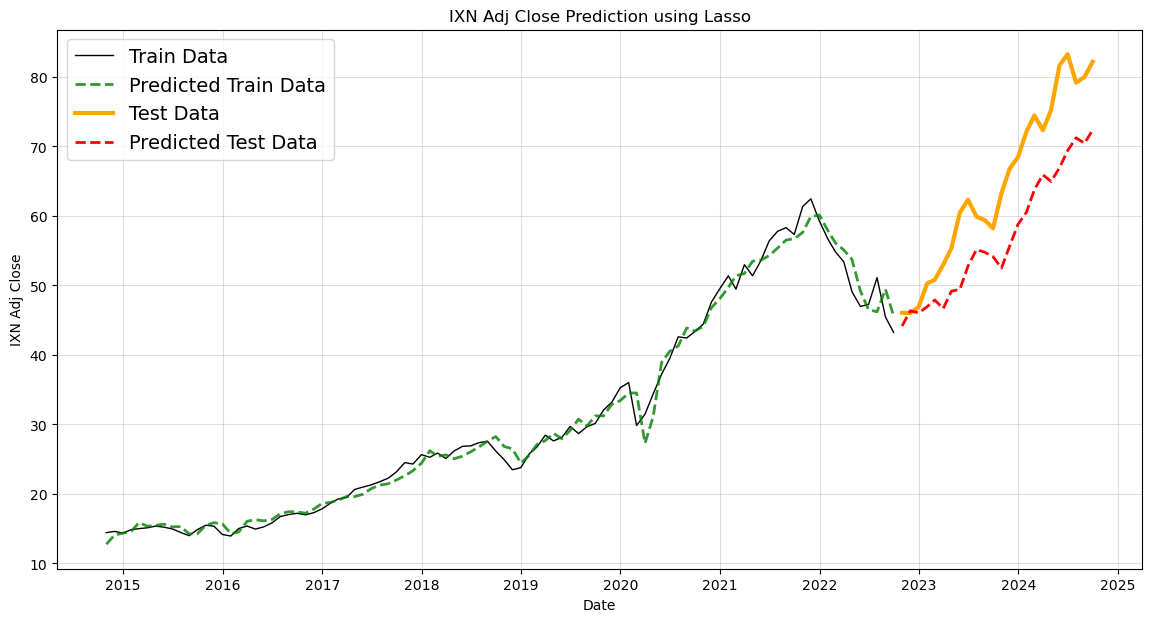

Performance Results for IXN
  Ticker        MSE      RMSE        R²      MAPE
0    IXN  73.531866  8.575072  0.492271  0.111582


Feature Importance for IXN
    Feature  Coefficient  Absolute Coefficient Ticker
2  CPIAUCSL    -0.246359              0.246359    IXN
9       SPY     0.145722              0.145722    IXN
7    VIXCLS     0.057756              0.057756    IXN
1     GDPC1     0.002158              0.002158    IXN
4    PAYEMS    -0.000269              0.000269    IXN


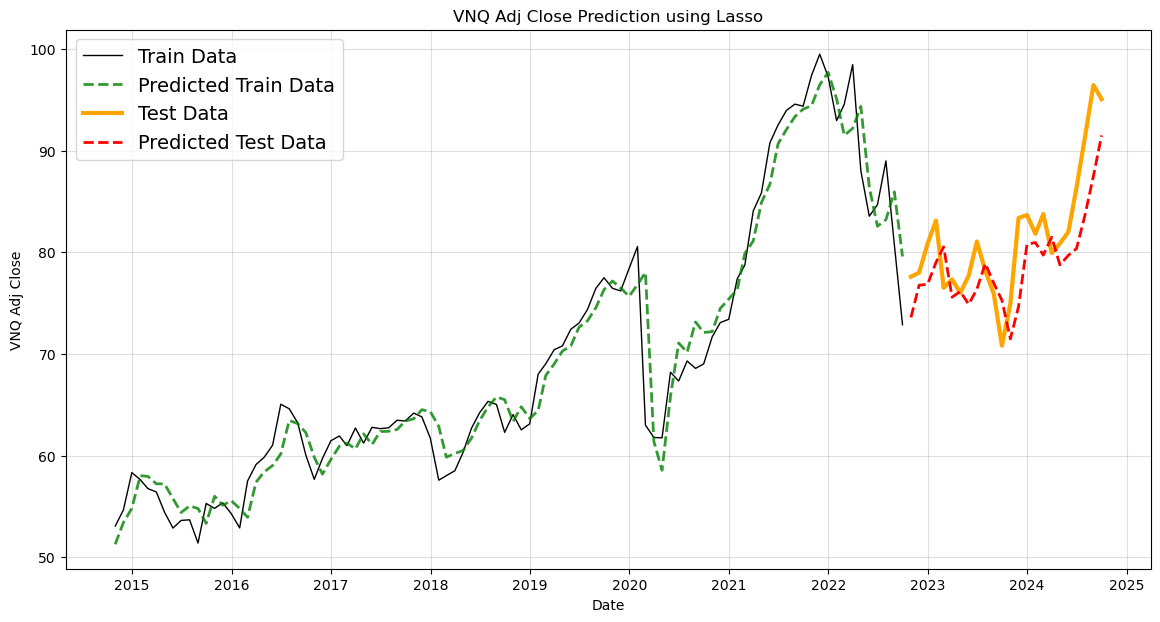

Performance Results for VNQ
  Ticker        MSE     RMSE        R²      MAPE
0    VNQ  18.128263  4.25773  0.495058  0.042715


Feature Importance for VNQ
     Feature  Coefficient  Absolute Coefficient Ticker
0        VNQ     0.741853              0.741853    VNQ
15  VNQ_MA_5     0.089984              0.089984    VNQ
7     VIXCLS     0.033228              0.033228    VNQ
2   CPIAUCSL    -0.027488              0.027488    VNQ
1      GDPC1     0.005492              0.005492    VNQ


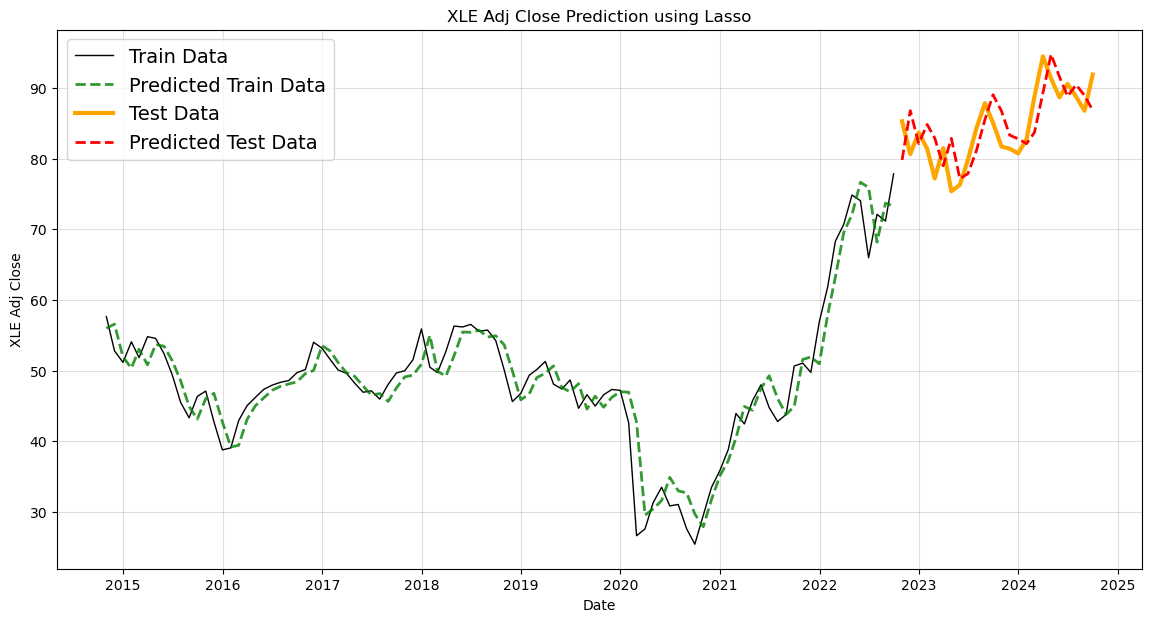

Performance Results for XLE
  Ticker        MSE      RMSE        R²      MAPE
0    XLE  14.850098  3.853582  0.410659  0.040524


Feature Importance for XLE
  Feature  Coefficient  Absolute Coefficient Ticker
0     XLE     0.953857              0.953857    XLE
9     SPY    -0.012994              0.012994    XLE
7  VIXCLS     0.002919              0.002919    XLE
1   GDPC1    -0.001267              0.001267    XLE
4  PAYEMS     0.000099              0.000099    XLE


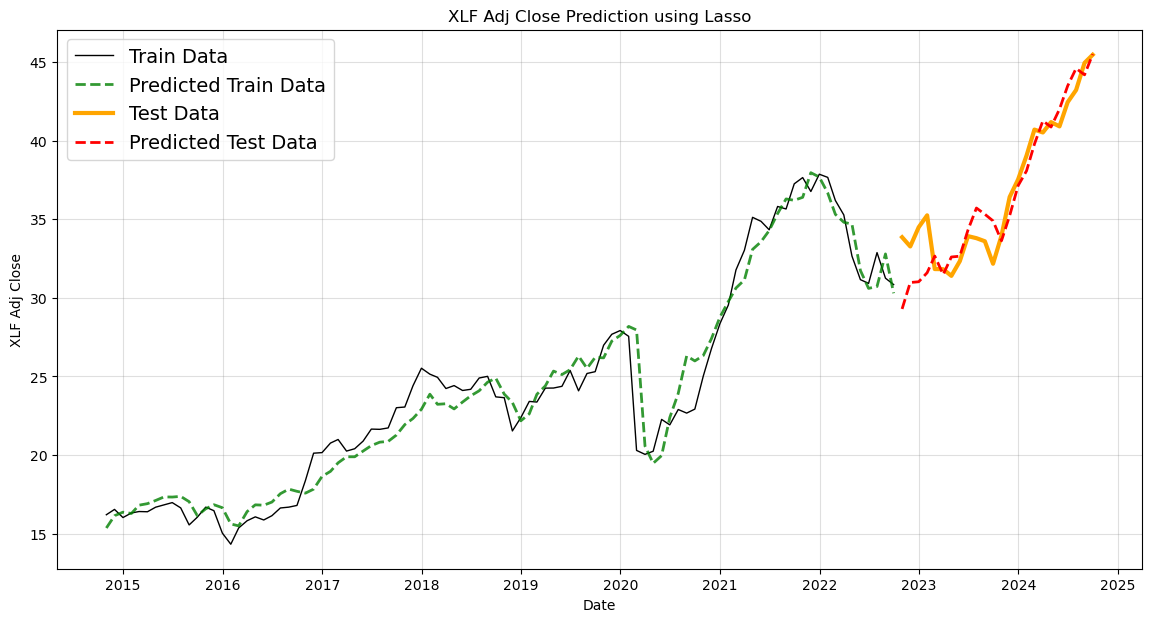

Performance Results for XLF
  Ticker       MSE      RMSE        R²      MAPE
0    XLF  3.200923  1.789112  0.836431  0.038473


Feature Importance for XLF
  Feature  Coefficient  Absolute Coefficient Ticker
9     SPY     0.081430              0.081430    XLF
0     XLF     0.058283              0.058283    XLF
1   GDPC1     0.002379              0.002379    XLF
4  PAYEMS    -0.000064              0.000064    XLF
5   RRSFS    -0.000002              0.000002    XLF


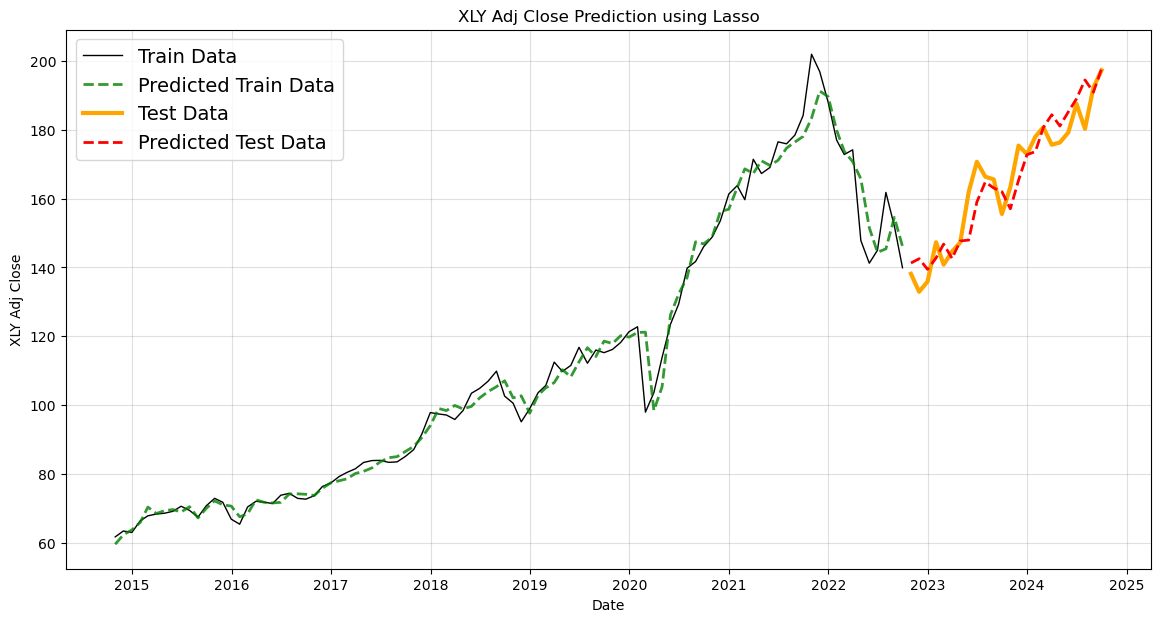

Performance Results for XLY
  Ticker        MSE      RMSE        R²      MAPE
0    XLY  44.138294  6.643666  0.866202  0.031686


Feature Importance for XLY
     Feature  Coefficient  Absolute Coefficient Ticker
2   CPIAUCSL    -0.640657              0.640657    XLY
0        XLY     0.394886              0.394886    XLY
7     VIXCLS     0.311800              0.311800    XLY
9        SPY     0.208546              0.208546    XLY
14  XLY_MA_2    -0.062871              0.062871    XLY


In [107]:
from sklearn.linear_model import Lasso

performance_results = []
feature_importance_results = []

# Loop through each ticker in TICKERS
for ticker in TICKERS:
    data = globals()[f'{ticker}_df'].copy()
    # Define features and target
    X = data  # Drop the current ticker from features
    y = data[ticker].shift(-1).dropna()  # Use the raw target variable
    X = X[:-1]  # Align X with y after shifting

    # Time-based train-test split
    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize and train the model
    model = Lasso()
    model.fit(X_train, y_train)

    # Make predictions for both training and test sets
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, test_predictions)
    mape = mean_absolute_percentage_error(y_test, test_predictions)  # No need for exponentiation

    # Store performance results
    performance_results.append({
        'Ticker': ticker,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape
    })

    # Coefficient analysis for feature importance
    coefficients = model.coef_
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': coefficients
    })
    feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
    feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)
    feature_importance['Ticker'] = ticker
    feature_importance_results.append(feature_importance)

    # Plotting the predictions for each ticker
    plt.figure(figsize=(14, 7))

    # Plot training data
    plt.plot(y_train.index, y_train, label="Train Data", color="black", linewidth=1, linestyle="-")

    # Plot predictions for training set
    plt.plot(y_train.index, train_predictions, label="Predicted Train Data", color="green", linewidth=2, linestyle="--", alpha=0.8)

    # Plot test data
    plt.plot(y_test.index, y_test, label="Test Data", color="orange", linewidth=3, linestyle="-")

    # Plot predictions for test set
    plt.plot(y_test.index, test_predictions, label="Predicted Test Data", color="red", linewidth=2, linestyle="--")

    # Add labels and legend
    plt.xlabel("Date")
    plt.ylabel(f"{ticker} Adj Close")
    plt.title(f"{ticker} Adj Close Prediction using Lasso")
    plt.legend()
    plt.show()

    # Convert performance results to DataFrame for the current ticker
    performance_df = pd.DataFrame(performance_results[-1:], columns=performance_results[-1].keys())
    print("Performance Results for", ticker)
    print(performance_df)
    print("\n")

    # Display feature importance for the current ticker immediately after the plot
    feature_importance_df = feature_importance_results[-1]  # Get the last entry
    print("Feature Importance for", ticker)
    print(feature_importance_df.head(5))


In [108]:
# Lasso performance results
Lasso_performance_df = pd.DataFrame(performance_results)
Lasso_performance_df

Ticker        MSE      RMSE        R²      MAPE
0    IXN  73.531866  8.575072  0.492271  0.111582
1    VNQ  18.128263  4.257730  0.495058  0.042715
2    XLE  14.850098  3.853582  0.410659  0.040524
3    XLF   3.200923  1.789112  0.836431  0.038473
4    XLY  44.138294  6.643666  0.866202  0.031686

In [109]:
Lasso_Result = Lasso_performance_df[["MSE", "RMSE","R²", "MAPE"]].mean().to_frame('Lasso').T
Lasso_Result

MSE      RMSE        R²      MAPE
Lasso  30.769889  5.023833  0.620124  0.052996

### 5) LSTM

In [110]:
!pip install tensorflow

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.1715
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0496 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0216 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0382 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0261 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0171 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0101
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0120 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0112 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0111 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━

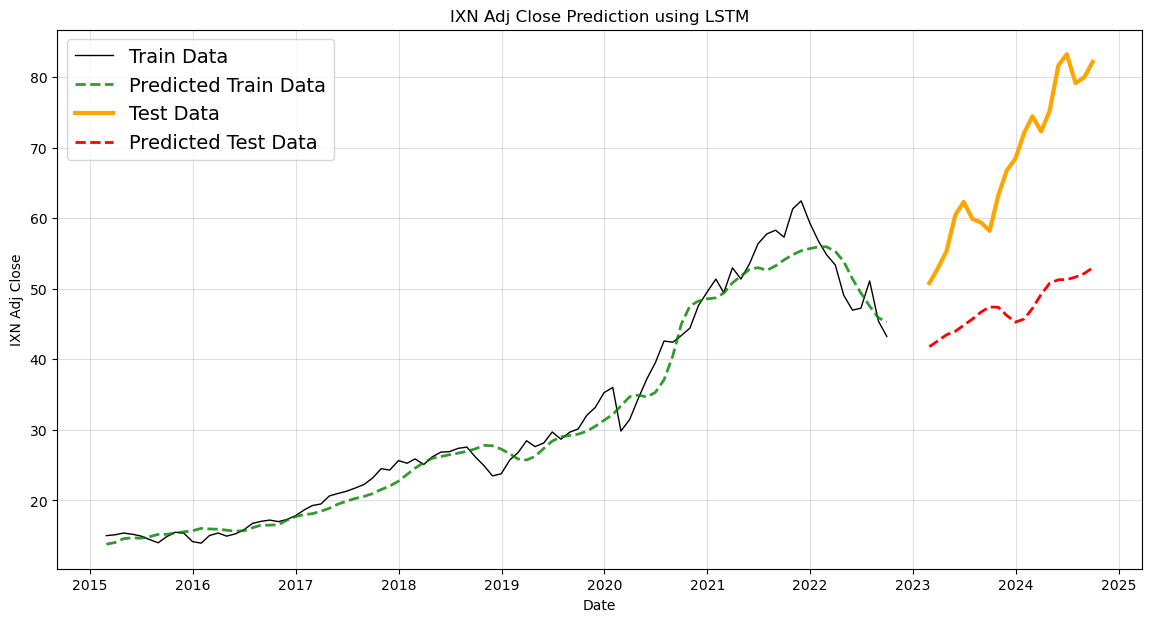

Performance Results for IXN
  Ticker         MSE       RMSE        R²      MAPE
0    IXN  474.800799  21.789924 -3.633931  0.292772


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.1704
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0894 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0352 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0406 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0407 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0378 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0161 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━

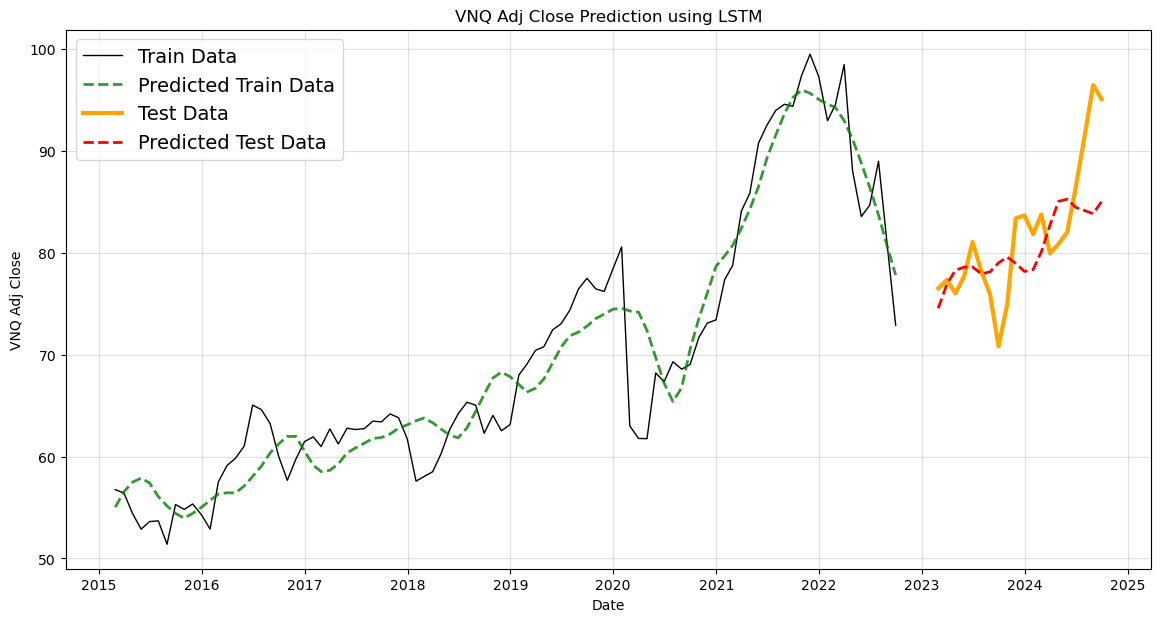

Performance Results for VNQ
  Ticker        MSE      RMSE        R²      MAPE
0    VNQ  26.812067  5.178037  0.354727  0.049052


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.2210
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1085 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0408 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0331 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0490 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0390 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0312 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0233 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0375 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0293 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0279 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0254 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0231 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━

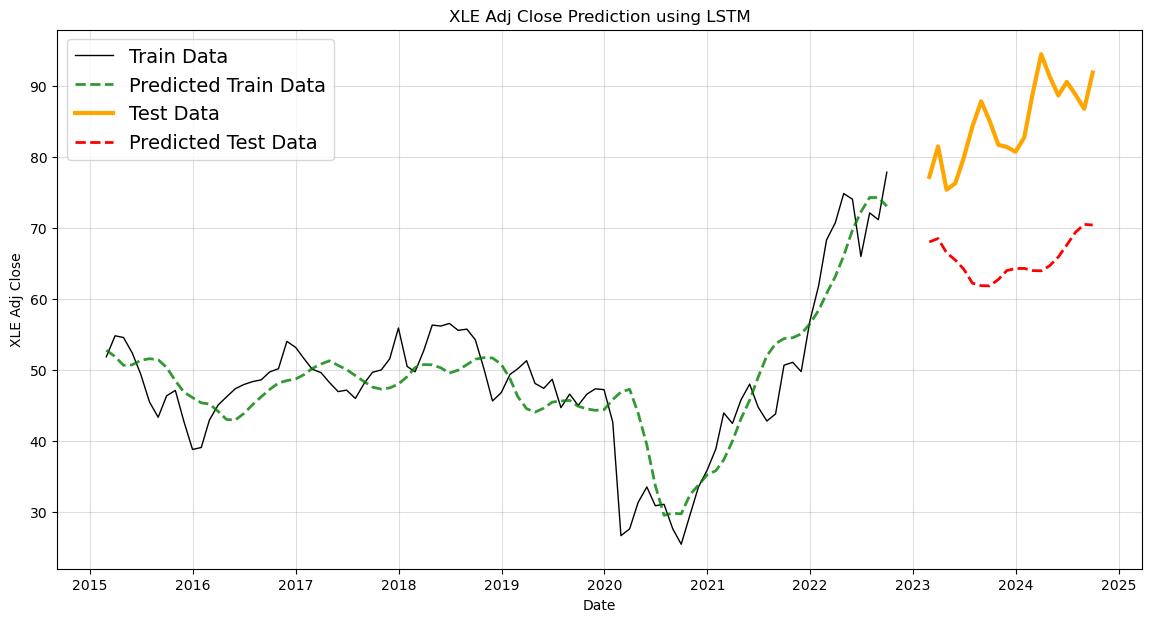

Performance Results for XLE
  Ticker         MSE       RMSE         R²      MAPE
0    XLE  404.554818  20.113548 -13.010326  0.224243


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.2546
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1358 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0658 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0310 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0415 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0295 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0199 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0212 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0243 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0196 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0175 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 
Epoch 14/50
3/3 ━━━━━━━━━━━━━

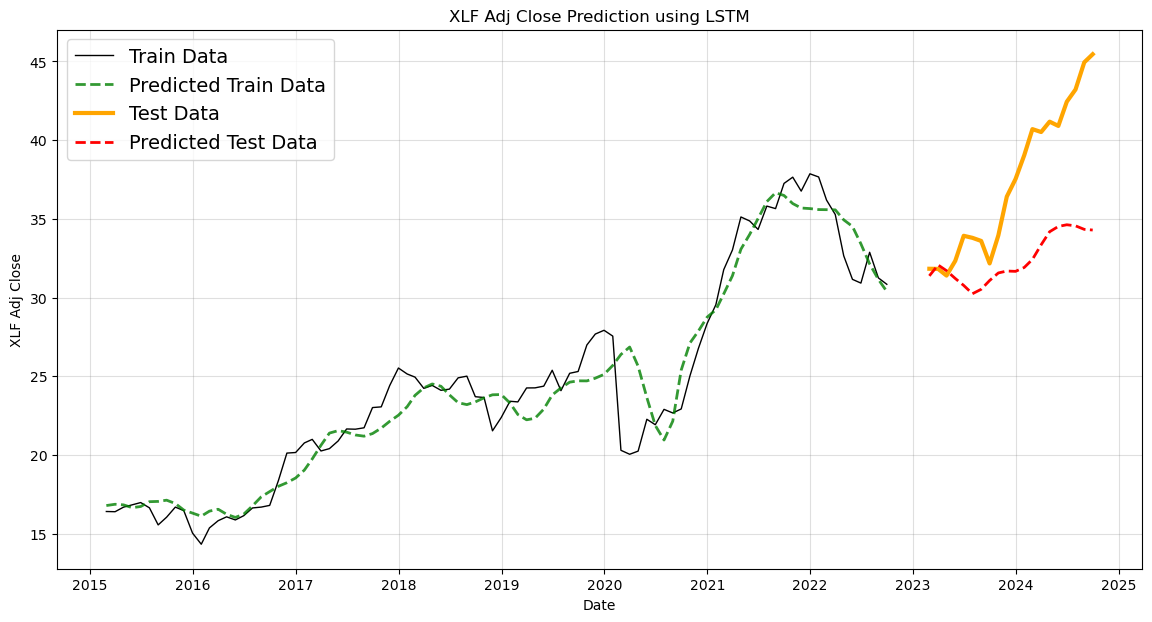

Performance Results for XLF
  Ticker        MSE      RMSE        R²      MAPE
0    XLF  36.549361  6.045607 -0.682112  0.125067


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 0.1367
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0753 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0361 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0402 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0313 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0145 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0140 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0173 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0148 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0078 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0092 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0125
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━

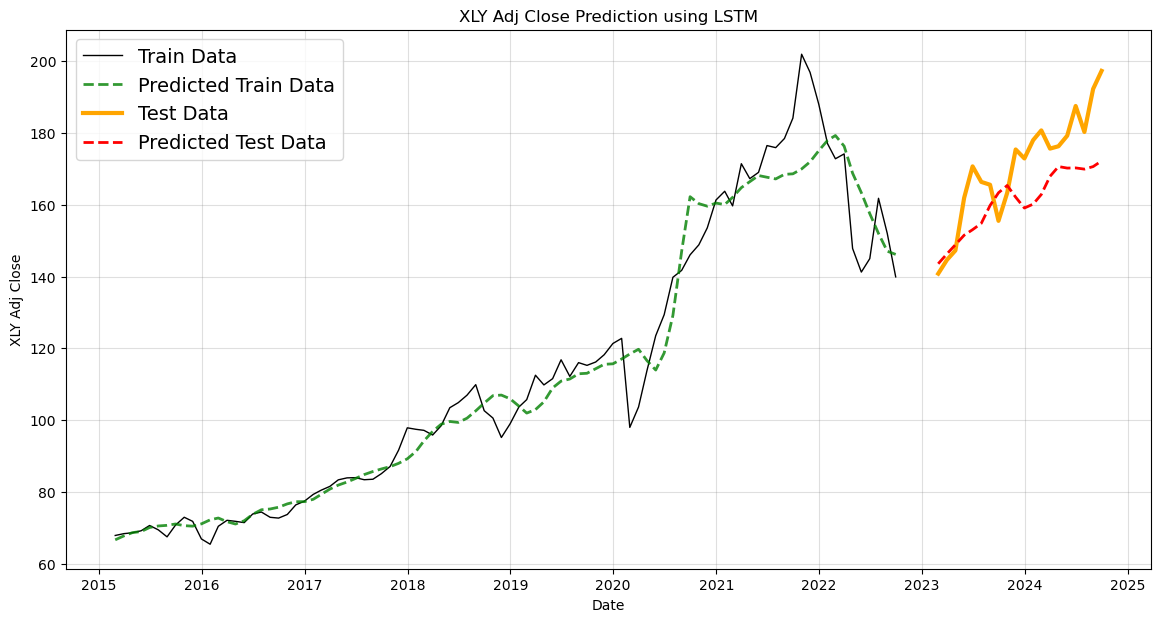

Performance Results for XLY
  Ticker         MSE       RMSE        R²      MAPE
0    XLY  167.232768  12.931851  0.237499  0.062343




In [112]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

performance_results = []

# Loop through each ticker in TICKERS
for ticker in TICKERS:
    data = globals()[f'{ticker}_df'].copy()
    
    # Define features and target
    X = data  # Drop the current ticker from features
    y = data[ticker].shift(-1).dropna()  # Use the raw target variable
    X = X[:-1]  # Align X with y after shifting

    # Time-based train-test split
    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Scale features and target using MinMaxScaler
    scaler_X = MinMaxScaler(feature_range=(0, 1))
    scaler_y = MinMaxScaler(feature_range=(0, 1))

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

    # Reshape data for LSTM
    time_step = 4  # Number of previous time steps to consider

    def create_dataset(dataset, target, time_step):
        X, y = [], []
        for i in range(len(dataset) - time_step):
            X.append(dataset[i:(i + time_step), :])
            y.append(target[i + time_step])
        return np.array(X), np.array(y)

    # Create LSTM input
    X_train_lstm, y_train_lstm = create_dataset(X_train_scaled, y_train_scaled, time_step)
    X_test_lstm, y_test_lstm = create_dataset(X_test_scaled, y_test_scaled, time_step)

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1)

    # Make predictions for both training and test sets
    train_predictions = model.predict(X_train_lstm)
    test_predictions = model.predict(X_test_lstm)

    # Inverse transform predictions and actual values
    train_predictions = scaler_y.inverse_transform(train_predictions)
    test_predictions = scaler_y.inverse_transform(test_predictions)
    y_train_lstm = scaler_y.inverse_transform(y_train_lstm)
    y_test_lstm = scaler_y.inverse_transform(y_test_lstm)

    # Evaluate the model
    mse = mean_squared_error(y_test_lstm, test_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_lstm, test_predictions)
    mape = mean_absolute_percentage_error(y_test_lstm, test_predictions)

    # Store performance results
    performance_results.append({
        'Ticker': ticker,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape
    })

    # Plotting the predictions for each ticker
    plt.figure(figsize=(14, 7))
    plt.plot(y_train.index[time_step:], y_train_lstm, label="Train Data", color="black", linewidth=1)
    plt.plot(y_train.index[time_step:], train_predictions, label="Predicted Train Data", color="green", linewidth=2, linestyle="--", alpha=0.8)
    plt.plot(y_test.index[time_step:], y_test_lstm, label="Test Data", color="orange", linewidth=3)
    plt.plot(y_test.index[time_step:], test_predictions, label="Predicted Test Data", color="red", linewidth=2, linestyle="--")

    # Add labels and legend
    plt.xlabel("Date")
    plt.ylabel(f"{ticker} Adj Close")
    plt.title(f"{ticker} Adj Close Prediction using LSTM")
    plt.legend()
    plt.show()

    # Display performance for the current ticker
    print(f"Performance Results for {ticker}")
    performance_df = pd.DataFrame(performance_results[-1:], columns=performance_results[-1].keys())
    print(performance_df)
    print("\n")


In [113]:
# LSTM performance results
LSTM_performance_df = pd.DataFrame(performance_results)
LSTM_performance_df

Ticker         MSE       RMSE         R²      MAPE
0    IXN  474.800799  21.789924  -3.633931  0.292772
1    VNQ   26.812067   5.178037   0.354727  0.049052
2    XLE  404.554818  20.113548 -13.010326  0.224243
3    XLF   36.549361   6.045607  -0.682112  0.125067
4    XLY  167.232768  12.931851   0.237499  0.062343

In [114]:
LSTM_Result = LSTM_performance_df[["MSE", "RMSE","R²", "MAPE"]].mean().to_frame('LSTM').T
LSTM_Result

MSE       RMSE        R²      MAPE
LSTM  221.989962  13.211793 -3.346829  0.150695

### MODEL PERFORMANCE COMPARISON

In [115]:
# MODEL, TICKER
performance_dfs = []

for model in ['LR', 'EN', 'Lasso', 'RFR', 'LSTM']:
    model_performance_df = globals()[f'{model}_performance_df']
    model_performance_df['Model'] = model
    performance_dfs.append(model_performance_df)

all_models = pd.concat(performance_dfs, axis=0, ignore_index=True)
all_models.set_index(['Model', 'Ticker'], inplace=True)

all_models.drop(columns="Average CV MSE", inplace = True)
all_models

MSE       RMSE         R²      MAPE
Model Ticker                                            
LR    IXN      46.281862   6.803077   0.680429  0.097239
      VNQ      40.147706   6.336222  -0.118269  0.062923
      XLE      23.940723   4.892926   0.049889  0.047207
      XLF       5.480805   2.341112   0.719927  0.049559
      XLY     178.962212  13.377676   0.457504  0.067173
EN    IXN      66.329941   8.144320   0.542000  0.107837
      VNQ      25.597158   5.059363   0.287020  0.050482
      XLE      14.974724   3.869719   0.405713  0.040315
      XLF       2.463180   1.569452   0.874130  0.034994
      XLY      47.413756   6.885765   0.856273  0.033777
Lasso IXN      73.531866   8.575072   0.492271  0.111582
      VNQ      18.128263   4.257730   0.495058  0.042715
      XLE      14.850098   3.853582   0.410659  0.040524
      XLF       3.200923   1.789112   0.836431  0.038473
      XLY      44.138294   6.643666   0.866202  0.031686
RFR   IXN     145.923409  12.079876  -0.007584  0.124479
      VNQ      27.487960   5.242896   0.234354  0.053719
      XLE     228.851413  15.127836  -8.082193  0.161215
      XLF      16.750345   4.092719   0.144046  0.078090
      XLY      75.362988   8.681186   0.771549  0.043968
LSTM  IXN     474.800799  21.789924  -3.633931  0.292772
      VNQ      26.812067   5.178037   0.354727  0.049052
      XLE     404.554818  20.113548 -13.010326  0.224243
      XLF      36.549361   6.045607  -0.682112  0.125067
      XLY     167.232768  12.931851   0.237499  0.062343

In [121]:
performance_dfs = []

# Loop through each model
for model in ['LR', 'EN', 'Lasso', 'RFR', 'LSTM']:
    model_performance_df = globals()[f'{model}_performance_df']
    model_performance_df['Model'] = model  # Add a column for the model name
    performance_dfs.append(model_performance_df)  # Append to the list


all_models2 = pd.concat(performance_dfs, axis=0, ignore_index=True)

# Set the multi-index
all_models2.set_index(['Ticker', 'Model'], inplace=True)
all_models2.sort_index(level=['Ticker', 'Model'], inplace=True)

# Drop the 'Average CV MSE' column
all_models2.drop(columns="Average CV MSE", inplace=True)

all_models2


MSE       RMSE         R²      MAPE
Ticker Model                                            
IXN    EN      66.329941   8.144320   0.542000  0.107837
       LR      46.281862   6.803077   0.680429  0.097239
       LSTM   474.800799  21.789924  -3.633931  0.292772
       Lasso   73.531866   8.575072   0.492271  0.111582
       RFR    145.923409  12.079876  -0.007584  0.124479
VNQ    EN      25.597158   5.059363   0.287020  0.050482
       LR      40.147706   6.336222  -0.118269  0.062923
       LSTM    26.812067   5.178037   0.354727  0.049052
       Lasso   18.128263   4.257730   0.495058  0.042715
       RFR     27.487960   5.242896   0.234354  0.053719
XLE    EN      14.974724   3.869719   0.405713  0.040315
       LR      23.940723   4.892926   0.049889  0.047207
       LSTM   404.554818  20.113548 -13.010326  0.224243
       Lasso   14.850098   3.853582   0.410659  0.040524
       RFR    228.851413  15.127836  -8.082193  0.161215
XLF    EN       2.463180   1.569452   0.874130  0.034994
       LR       5.480805   2.341112   0.719927  0.049559
       LSTM    36.549361   6.045607  -0.682112  0.125067
       Lasso    3.200923   1.789112   0.836431  0.038473
       RFR     16.750345   4.092719   0.144046  0.078090
XLY    EN      47.413756   6.885765   0.856273  0.033777
       LR     178.962212  13.377676   0.457504  0.067173
       LSTM   167.232768  12.931851   0.237499  0.062343
       Lasso   44.138294   6.643666   0.866202  0.031686
       RFR     75.362988   8.681186   0.771549  0.043968

In [122]:
all_models = pd.concat([LR_Result, EN_Result, Lasso_Result, RFR_Result, LSTM_Result], axis = 0)
all_models

MSE       RMSE        R²      MAPE
LR      58.962661   6.750203  0.357896  0.064820
EN      31.355752   5.105724  0.593027  0.053481
Lasso   30.769889   5.023833  0.620124  0.052996
RFR     98.875223   9.044902 -1.387966  0.092294
LSTM   221.989962  13.211793 -3.346829  0.150695